## All Life Bank

### Objectives

- To identify **different segments in the existing customer base** and recommend best approaches to better service these specific customers
    - Patterns, not easily identifiable in original dataset, should be determined through **various clustering algorithms and techniques**

**(Level of Significance to be Used for Statistical & Hypothesis Testing: 0.05)**

**Customer Details:**

- **Sl_No:** Primary index key of all records (Unique)
- **Customer Key:** Customer identification number (Unique)
- **Average Credit Limit:** Average credit limit of each customer for all credit cards
- **Total Credit Cards:** Total count of credit cards owned by each customer
- **Total Visits Bank:** Total number of annual visits made by customers to the bank
- **Total Visits Online:** Total number of annual online visits (including online logins) made by the customer
- **Total Calls Made:** Total number of annual support calls made by the customer to the bank (and/or service department) 

### Importing Libraries & Loading Data

In [1]:
# Interpreting and manipulating aata
import pandas as pd
import numpy as np

# Visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Remove warnings/notifications
import warnings
warnings.filterwarnings('ignore')

# Scale data using Z-Score (Mean +- 1 to 2 Std Dev)
from sklearn.preprocessing import StandardScaler

# Computed distances - for cluster centroids, etc.
from scipy.spatial.distance import cdist # Average Distortion (for Elbow Method, etc.)
from scipy.spatial.distance import pdist # Cophenetic Correlation (for Dendrogram)

# Perform KMeans Clustering & calculate Silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualize Elbow curve and Silhouette score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Hierarchical clustering, compute Cophenetic Correlation, create Dendrograms, measure Linkage (distinace between clusters)
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, linkage, dendrogram

# Perform Primary Component Analysis (PCA )
from sklearn.decomposition import PCA

In [2]:
# Import the dataset from Excel file
data = pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
# Create a copy of the data
df = data.copy()

In [4]:
# Examine the top 5 rows of data
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
# Examine the bottom 5 rows of data
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [6]:
# Inspect the shape of the dataset
df.shape

(660, 7)

In [7]:
# Inspect the datatype/s within the dataset and check missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


There are **660 rows and 7 columns** in the dataset, with **0 null values** and all variables are **numerical (int64) datatypes**.


For Unsupervised Learning, **we want all columns to be in numerical format for clustering**.

In [8]:
# Sum up all missing values, by column, to confirm no Nulls
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
# Perform a quick check for any duplicate rows of data in the dataset
df.duplicated().sum()

0

Again, there are no missing values in any of the columns of data.  There are **no duplicated rows** within the dataset.

In [10]:
# Examine the statiscial summary of the dataset - numeric only since there are no object/category datatypes
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


The **SI_No and Customer Key variables are hard to quantify** and gleam much insight into - they could be **unique identifiers and worth removing from the dataset**.

In [11]:
# Examine the unique value counts for each column in the dataset
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- **Sl_No** consists of only unique values and **can be removed** from the dataset due to adding no value in our analysis
- **Customer Key** is primarily unique as well, however there appear to be **5 values that are not unique and should be further examined** before deciding whether/not to removed the column
- The remaining columns show mostly large unique value counts, but are low enough to warrant full inclusion in the analysis

In [12]:
# Create short list of columns with unique counts under 20

Unique_Shortlist = []

for d in df:
    if df[d].nunique() <= 20:
        Unique_Shortlist.append(d)
        
Unique_Shortlist        

['Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [13]:
# Summarize unique counts for columns with small counts under 20 values, sorted ascending order

for cols in Unique_Shortlist:
    print('Unique Values in Column - {}: \n'.format(cols), sorted(df[cols].unique()))
    print('.'* 60)

Unique Values in Column - Total_Credit_Cards: 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
............................................................
Unique Values in Column - Total_visits_bank: 
 [0, 1, 2, 3, 4, 5]
............................................................
Unique Values in Column - Total_visits_online: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
............................................................
Unique Values in Column - Total_calls_made: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
............................................................


For the summarized columns above, the unique values indicate **accurate numbers (no anomalies/errors)**, with a Minimum range of 1 through 5 and Maximum range 1 through 15.

In [14]:
# Identify those Customer Keys with more than 1 count
df['Customer Key'].value_counts()

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

In [15]:
# Pull all data where Customer Key has a count (len) greater than 1, sorted by Customer Key in ascending order
df.groupby('Customer Key').filter(lambda x: len(x) > 1).sort_values(by='Customer Key', ascending=True)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


Although there are duplicated Customer Keys, the respective **Credit Limits and customer behaviors vary substantially between each Customer Key grouping and appear to add value to the clustering approach, rather than detracting from it**.  It is therefore sufficient to keep the rows of data intact and simply **remove the Customer Key field** that serves similar to the SI_No column ovderall.

In [16]:
# Drop the two columns referenced above due to nearly 100% unique values in each and offering little analytical benefit
df.drop(columns=['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [17]:
# ReExamine the statiscial summary of the dataset
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


### Insights
- The **Average Credit Limit appears to be right skewed** (Mean larger, almost double, than the Median)
- The **remaining variables are largely normally distributed**, with the Mean and Median (all Discrete numbers) very similar overall
- 50% of the customers sampled:
    - Have **Credit Limits \\$18k or lower, with half of those customers having at least \\$10k in Credit Limit**
    - Visit the bank in person and online at least 2 times respectively each year
    - Make at least 3 calls to the bank each year
- The **minimum value of 0 appears accurate** in regards to visits (physical/online) and calls to the bank in a year, as **not every customer chooses to actively engage their bank annually**    

In [18]:
# Inspect the entire dataset where 0 value shown for: Bank Visits

df[df['Total_visits_bank']==0]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
...,...,...,...,...,...
645,171000,10,0,15,0
646,186000,7,0,8,1
647,183000,9,0,9,2
653,95000,10,0,15,1


In [19]:
# Inspect the entire dataset where 0 value shown for: Online Visits

df[df['Total_visits_online']==0]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
228,10000,7,2,0,0
230,17000,4,5,0,2
234,16000,6,5,0,4
235,13000,7,4,0,0
237,8000,6,4,0,4
...,...,...,...,...,...
589,29000,4,5,0,2
600,68000,7,5,0,0
601,33000,5,4,0,2
602,37000,7,4,0,1


In [20]:
# Inspect the entire dataset where 0 value shown for: Calls to the Bank

df[df['Total_calls_made']==0]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
228,10000,7,2,0,0
232,20000,5,4,1,0
233,13000,7,2,1,0
235,13000,7,4,0,0
...,...,...,...,...,...
645,171000,10,0,15,0
648,111000,8,1,7,0
652,156000,8,1,8,0
655,99000,10,1,10,0


All three variables appear to show accurate, and substantial, data when a minimum value of 0 exists.  These are **therefore not Null/0 error values but rather true indicators of customer preferences** (not wanting to engage the bank in the chosen method selected).

## EDA

### Univariate Analysis

In [21]:
def Histogram_Boxplot (Data, Feature, Figsize=(20,10), KDE=False, Bins=None):
    """
    Histogram and Boxplot Blend, Sharing X Axis
    
    Data: Dataframe for sample dataset
    Feature: Specific column to display
    Figsize: Default size set for X/Y axes
    KDE: Showing kernal density estimation (default to False)
    Bins: Number of bins to set for histogram (default to None unless input for a specific variable)
    """
    
    f1, (ax_box1, ax_hist1) = plt.subplots(
    nrows = 2, # 2 rows for each Histogram/Boxplot blend
    sharex = True, # Use the same X Axis for each Graph
    gridspec_kw={'height_ratios':(0.25, 0.75)}, # Creates a Grid for each Graph blend
    figsize = Figsize
    ) 
    
    # Create the subplots
    
    # Boxplot
    sns.boxplot(data=Data, x=Feature, ax=ax_box1, showmeans = True, color = 'green') # Include mean on box and color box green
    # Histogram
    sns.histplot(
        data=Data, x=Feature, kde=KDE, ax=ax_hist1, bins=Bins, palette='seismic'
    )   if Bins else sns.histplot(data=Data, x=Feature, kde=KDE, ax=ax_hist1)
    
    ax_hist1.axvline(data[Feature].mean(), color = 'red', linestyle = '--') # Include a Mean indicator line on Histogram
    ax_hist1.axvline(data[Feature].median(), color = 'purple', linestyle = '-.') # Include a Median indicator line on Histogram

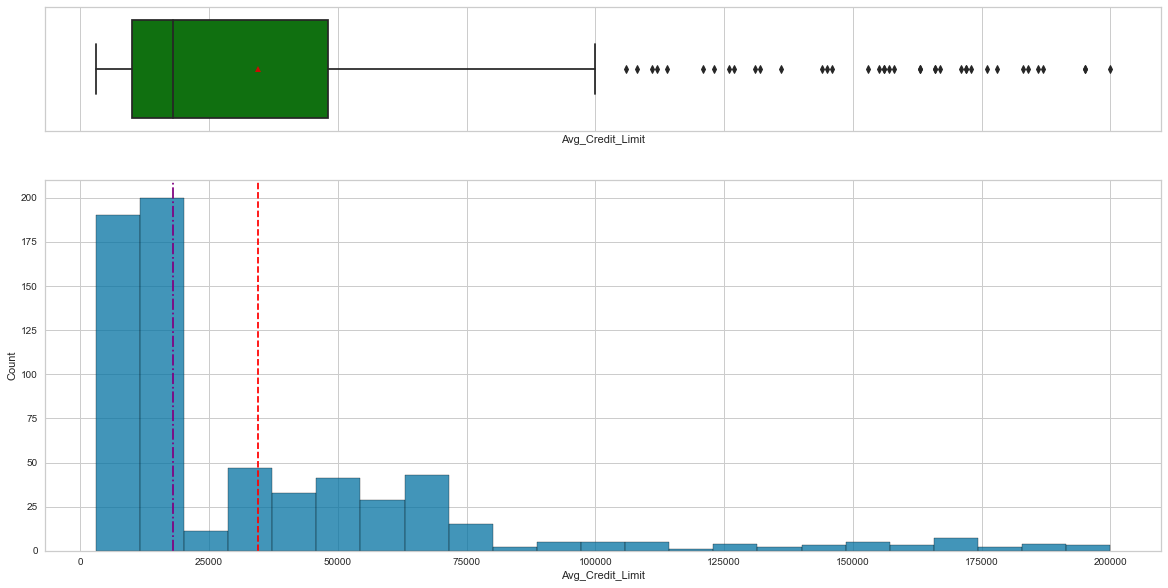

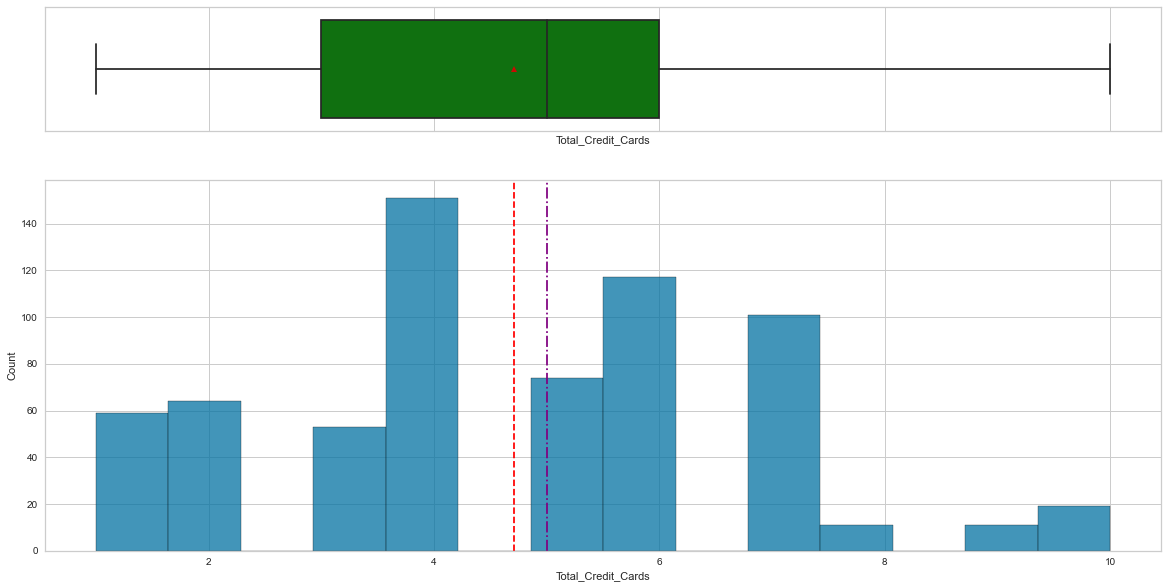

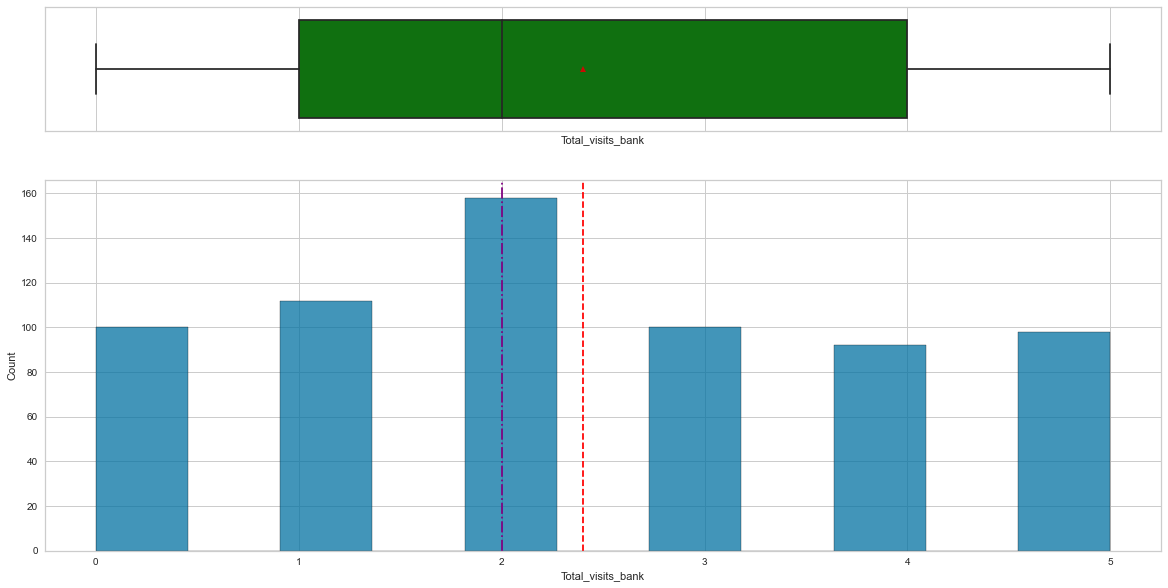

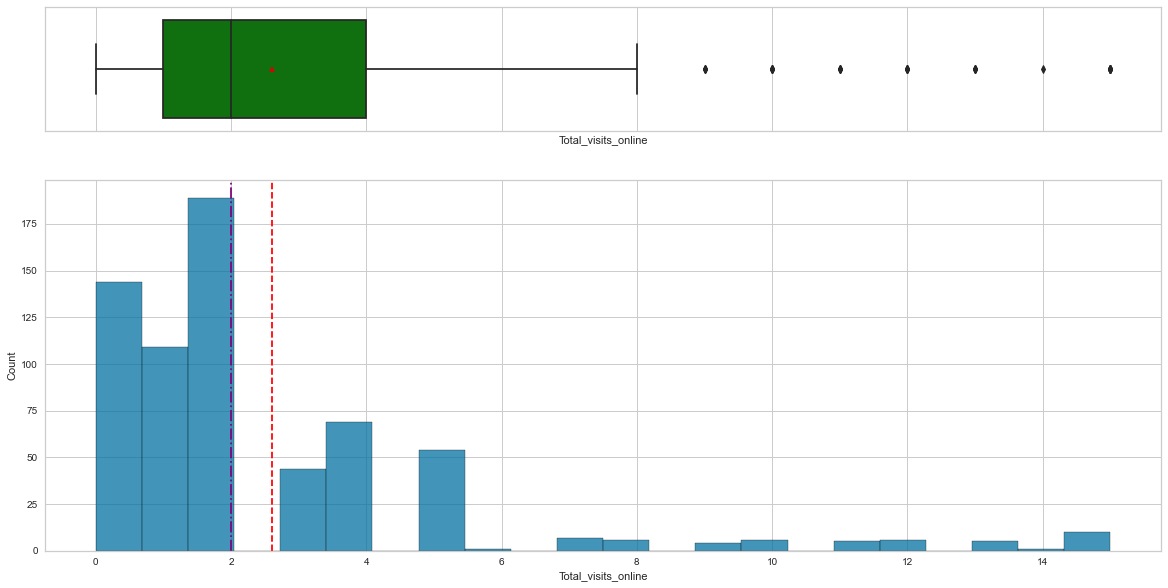

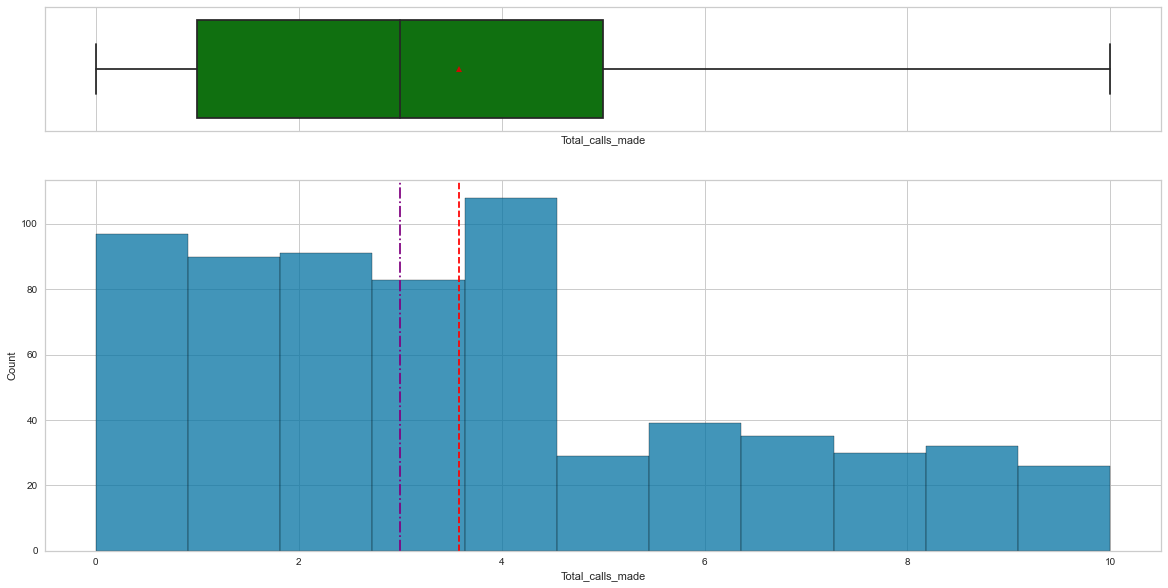

In [22]:
# Create a list of all Numeric Columns in the dataset
Numeric_Cols = df.select_dtypes(include=np.number).columns.tolist() 
Numeric_Cols

# Run a Loop through all Numeric Cols, calling the Histogram/Boxplot function for each

for i in Numeric_Cols:
    Histogram_Boxplot(df, i)

### Observations
- Average Credit Limit: 50% of Customers have a Credit Limit of \\$18k or less, however the data is **right skewed (Mean larger than Median) due to a larger Mean Limit of closer to \\$35k with numerous outlier customers with Credit Limits well over \\$100k**
- Total Credit Cards: Relatively normally distributed (slightly left skewed - Median larger than Mean) with 50% of customers **owning at least 5 Credit Cards**
- Total Visits to Bank: Relatively normally distributed (slightly right skewed - Mean larger than Median) with 50% of customers **visiting the Bank at least 2 times a year**
- Total Online Visits to Bank: Right skewed distribution (Mean larger than Median), with 50% of customers making at least 2 online visits to their bank accounts each year
    - There are **numerous outliers where customers visited their online accounts between 8 and 15 times a year**, however this doesn't appear to be a true 'outlier' conceptually as that is **anywhere from less than 1 to 1.25 times a month which isn't excessive**
- Total Calls made to Bank: Slightly right skewed (Mean larger than Median) with 50% of customers **calling the Bank at least 3 times a year** but some customers calling between 5 and 10 times a year
    - Similar to online visits, this **doesn't appear to be excessive to call less than once a month on average**


In [23]:
def Labeled_Barplot(Data, Feature, Percentage=False, Top_Cats=None):
    """
    Barplot with percentages atop each Variable
    
    Data: Dataframe for sample dataset
    Feature: Specific column to display
    Percentage: Display percentages instead of counts (default is False)
    Top_Cats: Displays the top (n) Category levels (default is None/Show All)
    """
    
    Total = len(Data[Feature]) # Length of column within dataset
    Count = Data[Feature].nunique() # Count each unique value in the given column
    
    if Top_Cats == None:
        plt.figure(figsize=(Count + 1, 5)) # Specify Count up to max columns included (5 in this dataset)
    else:
        plt.figure(figsize=(Top_Cats + 1, 5)) # Use the top Category focus instead of total count, up to max of 5 columns
       
    plt.xticks(rotation=90, fontsize=15) # Rotate all x labels 90% on axis
    ax = sns.countplot(data=Data, x=Feature, palette='icefire',
                      order=Data[Feature].value_counts().index[:Top_Cats].sort_values())
    
    for p in ax.patches:
        if Percentage == True:
            Label = '{:.1f}%'.format(100 * p.get_height() / Total) # Include the percentage of each Feature divided by Total
        else:
            Label = p.get_height()
            
        x = p.get_x() + p.get_width() / 2 # Get Width of Plot
        y = p.get_height() # Get Height of Plot
        
        
        ax.annotate(Label, (x, y), 
                    ha = 'center', va ='center', # Horizontal/Vertical alignment of annotations
                   size = 15, xytext = (0,5),
                   textcoords = 'offset points')
        

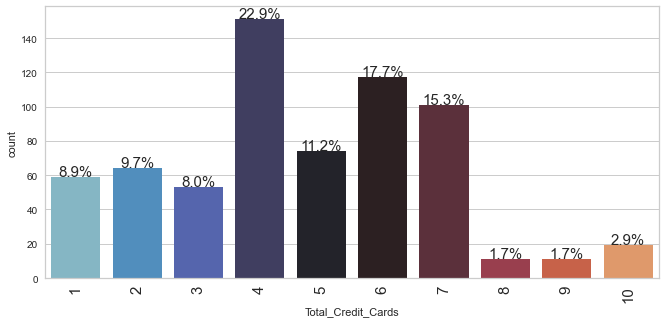

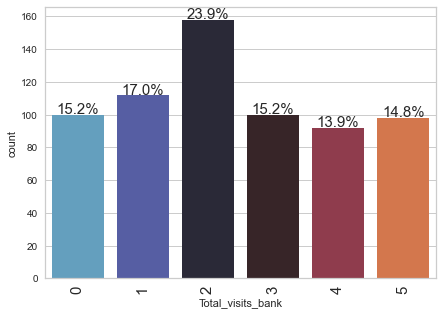

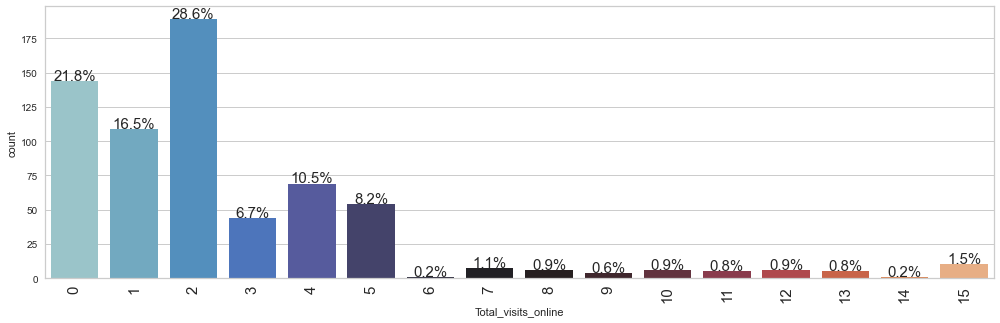

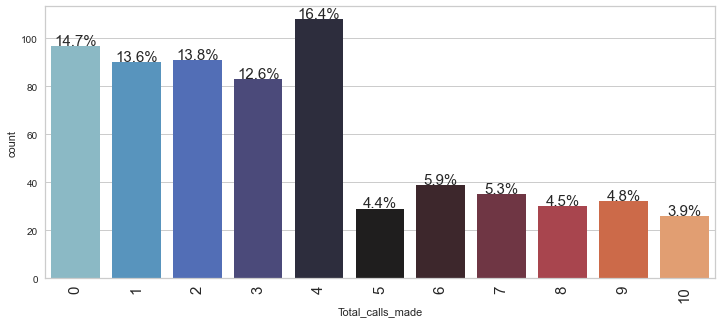

In [24]:
# Remove Average Credit Limit from Numeric_Cols list as it has too many Unique values to show
Numeric_Cols1 = Numeric_Cols[1:5]
Numeric_Cols1

# Run a Loop through all Numeric Cols1, calling the Histogram/Boxplot function for each

for j in Numeric_Cols1:
    Labeled_Barplot(df, j, Percentage=True)

### Observations
- **Nearly a quarter of all customers sampled own a total of 4 Credit Cards**, followed by customers owning 6 and 7 total Credit Cards (18% and 15% respectively)
    - Around 6% of customers have **between 8 and 10 total Credit Cards**
- Nearly a quarter of all customers sampled visited the bank 2 times a year on average
    - **15% of customers never visited the bank in a year**
    - 44% of customers visited the bank between 3 to 5 times a year - not necessarily an indicator of any service issues, etc., but could be based on customer preference
- 67% of customers sampled visited their online bank accounts 0 to 2 times in a year which appears very low, with **22% of them never using their accounts at all in a given year**
- Over 70% of customers called the bank less than 5 times in a given year, which appears relatively low but should be further reviewed
    - **Around 15% of customers never called the bank at all**, which could **indicate satisfaction** with their service or, inversely, a **lack of interest in the bank due to dissatisfaction**, etc.

### Bivariate Analysis

In [25]:
# Check for Correlations in the data - can use df since all columns are Numeric
Corr = df.corr()
Corr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


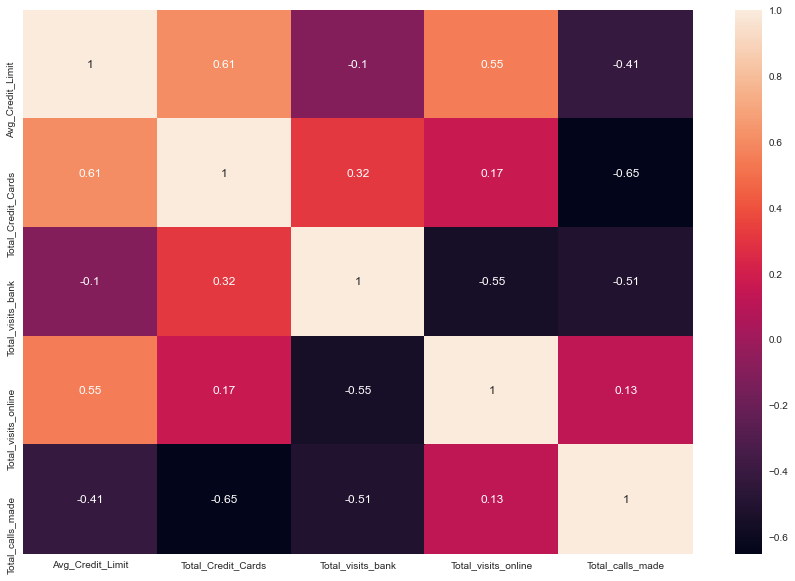

In [26]:
# Visualize the Correlations above in a HeatMap format, with Annotations included

plt.figure(figsize=(15,10))
sns.heatmap(Corr, annot=True);

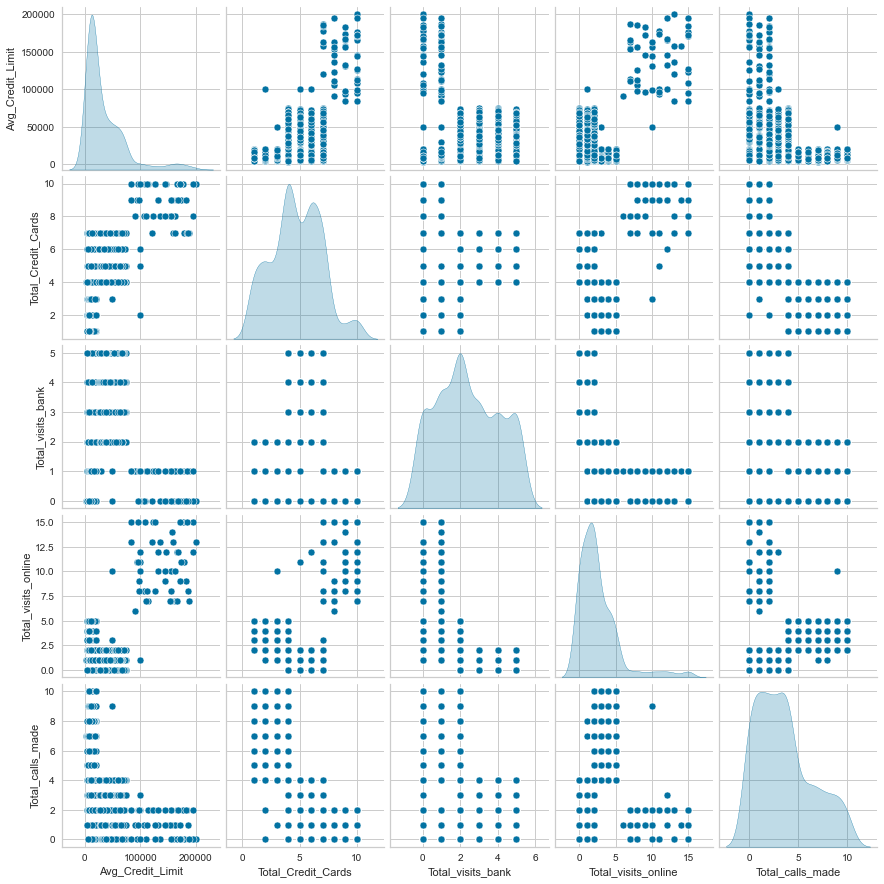

In [27]:
sns.pairplot(df, diag_kind='kde');

### Observations
- Average Credit Limit is positively correlated with Total Credit Cards, **as additional Credit Cards increase one's overall Credit Limit available, provided the cards aren't maxed out each time**
- Total Calls Made shows a strong negative correlation to Total Credit Cards, indicating that **as customers increase their frequency of calls the bank their desire for credit with the bank stagnates or decreases**
    - This could also indicate instead that the **customers with Lower Credit Limits are those more often calling for support**, or payment forbearance services, etc.
- Conversely, Total (physical) visits to the bank is somewhat positively correlated to Total Credit Cards owned
    - This could indicate that these **in-person bank visits are improving customer loyalty and possibly converting new Credit sale**s or further limit increases for those customers engaging with the bank more frequently
    - This could also be associated with **customers needing the higher Credit Limits needing to visit the bank in person** to apply for and explain their needs for the higher limits so as to improve their chances of approval
- **Total Credit Cards, Total Visits to Bank, and Total Calls Made all show multimodality**, which should be factored in upon Clustering during **Unsupervised Learning** analysis
    - Average Credit Limit and Total Visits Online appear to be Normally Distributed, excluding some outliers

### Scaling the Data

In [28]:
# Scale the data using Z-Scores (Mean, 1 Std Dev, 2 Std Dev)

Scaler = StandardScaler()
df_subset = df.copy() # Create a copy of the dataset for scaling - then either the scaled or orignal can be used for comparison

# Fit the Scaler to the subset data copy
Subset_Scaled = Scaler.fit_transform(df_subset)

# Create a DataFrame of the scaled subset
Subset_Scaled_df = pd.DataFrame(Subset_Scaled, columns=df_subset.columns)

In [29]:
Subset_Scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


### K-Means Clustering

We will **initially assume a default of 8 clusters** (feature default provided) for initial k-Means Clustering, then will lower as needed after further analysis.

### Creating Elbow Curve

Number of Clusters: 1 	Average Distortion: 2.006922226250366
Number of Clusters: 2 	Average Distortion: 1.4571553548514262
Number of Clusters: 3 	Average Distortion: 1.146627654915036
Number of Clusters: 4 	Average Distortion: 1.046382529477446
Number of Clusters: 5 	Average Distortion: 0.9908683849620172
Number of Clusters: 6 	Average Distortion: 0.9429694352677837
Number of Clusters: 7 	Average Distortion: 0.9096084805387925
Number of Clusters: 8 	Average Distortion: 0.8903448334117098


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

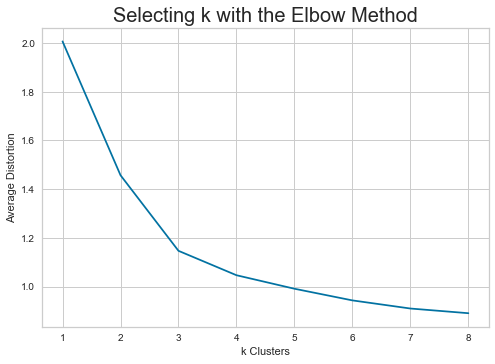

In [30]:
# Create a range for all 8 Clusters - the default for K-Means Clustering

Clusters = range(1,9)
Mean_Distortions = []

# Loop through each cluster and fit the K Means model to the scaled DataFrame
for k in Clusters:
    Model = KMeans(n_clusters=k)
    Model.fit(Subset_Scaled_df)
    Prediction = Model.predict(Subset_Scaled_df)
    
    Distortion = (
        sum(np.min(cdist(Subset_Scaled_df, Model.cluster_centers_, 'euclidean'), axis=1)
            / Subset_Scaled_df.shape[0])) # Calculate distortions as Min Distance to Cluster Centroid / by total record row count 
    
    Mean_Distortions.append(Distortion)     
   
    print('Number of Clusters:', k, '\tAverage Distortion:', Distortion)     

# Plot the k Clusters (points) onto a Graph showing Elbow Method
plt.plot(Clusters, Mean_Distortions, "bx-")
plt.xlabel("k Clusters")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**4 Clusters** appears to be the correct value for k from the Elbow Curves.

### Calculating Silhouette Scores

For n_clusters = 2, silhouette score is 0.41842496663230405
For n_clusters = 3, silhouette score is 0.5157182558882754
For n_clusters = 4, silhouette score is 0.35566706193773706
For n_clusters = 5, silhouette score is 0.2717470361094591
For n_clusters = 6, silhouette score is 0.25545029453735185
For n_clusters = 7, silhouette score is 0.24857211535401377
For n_clusters = 8, silhouette score is 0.2267217120348171
For n_clusters = 9, silhouette score is 0.22626549156106135


Text(0.5, 1.0, 'Selecting k with Silhouette Score')

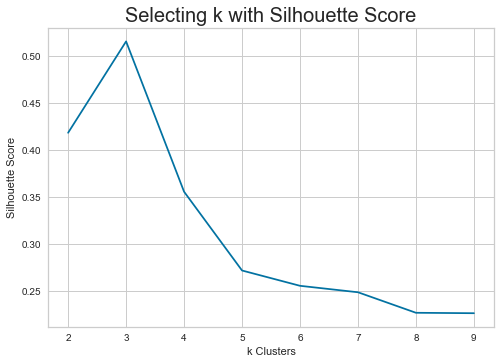

In [31]:
Sil_Scores = []
Clusters_List = list(range(2,10)) # Minimum of 2 clusters required in order to compare closeness within cluseter and nearest cluster

for n_Clusters in Clusters_List:
    Clusterer = KMeans(n_clusters=n_Clusters)
    Predictions = Clusterer.fit_predict(Subset_Scaled_df) # Fit the scaled subset to the k Means Clusterer
    
    # Calculate Silhouette Scores
    Score = silhouette_score(Subset_Scaled_df, Predictions)
    Sil_Scores.append(Score) # Append each score into Silhouette Score list
    
    print('For n_clusters = {}, silhouette score is {}'.format(n_Clusters, Score))

# Plot the Silhouette Scores and Clusters
plt.plot(Clusters_List, Sil_Scores)
plt.xlabel("k Clusters")
plt.ylabel("Silhouette Score")
plt.title("Selecting k with Silhouette Score", fontsize=20)

Based on the Silhouette Scores above, at **4 clusters appear to be the best value for k**.

### Visualizing Silhouette Scores

We want to **also see the cluster depth (size)** of various cluster combinations, in addition to just the optimal Silhouette Score and Elbow Curve placement.

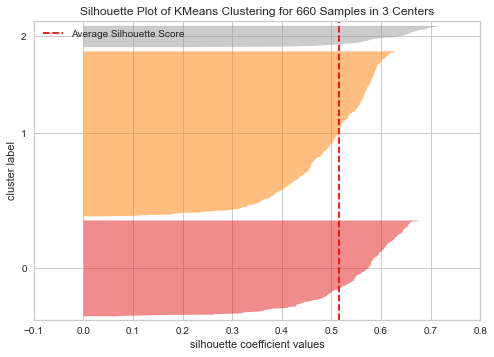

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# Create and show a visualizer of Silhouette Scores for various KMeans Clusters, with random state set to 1
Visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1)) 
Visualizer.fit(Subset_Scaled_df)
Visualizer.show()

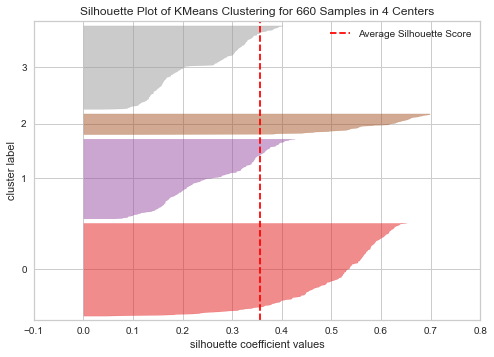

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# Create and show a visualizer of Silhouette Scores for various KMeans Clusters, with random state set to 1
Visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1)) 
Visualizer.fit(Subset_Scaled_df)
Visualizer.show()

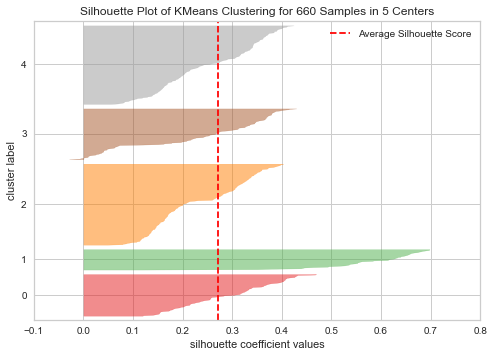

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# Create and show a visualizer of Silhouette Scores for various KMeans Clusters, with random state set to 1
Visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1)) 
Visualizer.fit(Subset_Scaled_df)
Visualizer.show()

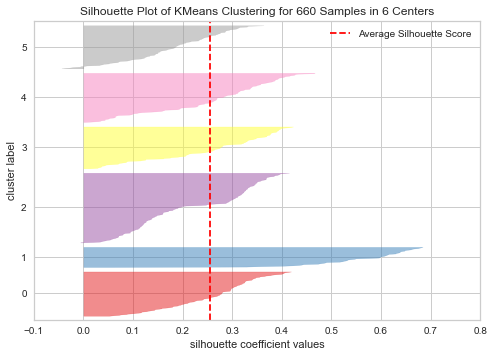

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# Create and show a visualizer of Silhouette Scores for various KMeans Clusters, with random state set to 1
Visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1)) 
Visualizer.fit(Subset_Scaled_df)
Visualizer.show()

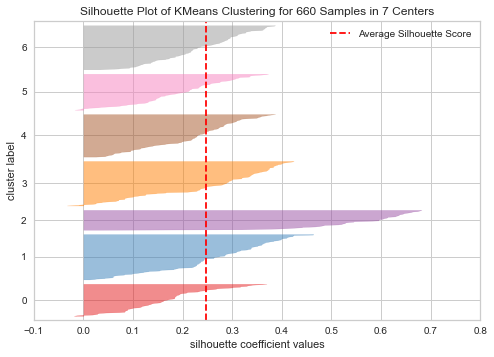

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
# Create and show a visualizer of Silhouette Scores for various KMeans Clusters, with random state set to 1
Visualizer = SilhouetteVisualizer(KMeans(7, random_state = 1)) 
Visualizer.fit(Subset_Scaled_df)
Visualizer.show()

**4 Clusters** appears to be the best option for k overall, as it provided:
- An adequate **kink in the Elbow Curve**
- The **third highest Silhouette Score (0.36)**
    - This is only lower than 2 and 3 clusters, each of which are probably too small overall and result in large (deep) clusters)

In [37]:
# Set k Mean Clusters to 4 as summarized above
k_Means = KMeans(n_clusters=4, random_state=0) # Set a different random state that 1 used above, for new k-Means testing
k_Means.fit(Subset_Scaled_df) # Fit to the scaled data subset

KMeans(n_clusters=4, random_state=0)

In [38]:
# Adding the Means Cluster Labels above to the Scaled DataFrame
Subset_Scaled_df['k-Means Segments'] = k_Means.labels_ # Create a new column in the dataframe that summarizes the 4 (0-3) clusters above
Subset_Scaled_df['k-Means Segments']

0      3
1      1
2      3
3      3
4      2
      ..
655    2
656    2
657    2
658    2
659    2
Name: k-Means Segments, Length: 660, dtype: int32

In [39]:
# Adding the Means Cluster Labels above to the Original DataFrame
df['k-Means Segments'] = k_Means.labels_ # Create a new column in the dataframe that summarizes the 4 (0-3) clusters above
df['k-Means Segments']

0      3
1      1
2      3
3      3
4      2
      ..
655    2
656    2
657    2
658    2
659    2
Name: k-Means Segments, Length: 660, dtype: int32

### Create Cluster Profiles

#### Original Data

In [40]:
Cluster_Profile1 = df.groupby('k-Means Segments').mean() # Group entire DataFrame Means by the 4 K-Means Segments above (0-3)
Cluster_Profile1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
k-Means Segments,,,,,
0,31226.315789,5.478947,4.515789,1.010526,1.936842
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,35904.522613,5.522613,2.477387,0.969849,2.075377


In [41]:
# Group the Counts per Segment by Average Credit Limit in descending order
Cluster_Profile1['Count_in_each_Segment'] = (df.groupby('k-Means Segments')['Avg_Credit_Limit'].count().values)

#### Scaled Data

In [42]:
Cluster_Profile2 = Subset_Scaled_df.groupby('k-Means Segments').mean() # Group entire DataFrame Means by the 4 K-Means Segments above (0-3)
Cluster_Profile2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
k-Means Segments,,,,,
0,-0.089048,0.356795,1.295713,-0.543901,-0.575064
1,-0.595974,-1.067493,-0.904851,0.330186,1.166460
2,2.831764,1.862226,-1.105763,2.827319,-0.874330
3,0.035383,0.376953,0.045601,-0.557768,-0.526678


In [43]:
# Group the Counts per Segment by Average Credit Limit in descending order
Cluster_Profile2['Count_in_each_Segment'] = (Subset_Scaled_df.groupby('k-Means Segments')['Avg_Credit_Limit'].count().values)

### Plot Cluster Profiles

#### Summary Table - Original Data

In [44]:
Cluster_Profile1.style.highlight_max(color = 'lightblue', axis=0) # Highlight the max colors of each column for each k-Mean Segment

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_Segment
k-Means Segments,,,,,,
0,31226.315789,5.478947,4.515789,1.010526,1.936842,190
1,12167.420814,2.393665,0.927602,3.574661,6.923077,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,35904.522613,5.522613,2.477387,0.969849,2.075377,199


#### Summary Table - Scaled Data

In [45]:
Cluster_Profile2.style.highlight_max(color = 'lightblue', axis=0) # Highlight the max colors of each column for each k-Mean Segment

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_Segment
k-Means Segments,,,,,,
0,-0.089048,0.356795,1.295713,-0.543901,-0.575064,190
1,-0.595974,-1.067493,-0.904851,0.330186,1.166460,221
2,2.831764,1.862226,-1.105763,2.827319,-0.874330,50
3,0.035383,0.376953,0.045601,-0.557768,-0.526678,199


#### Box Plot - Original Data

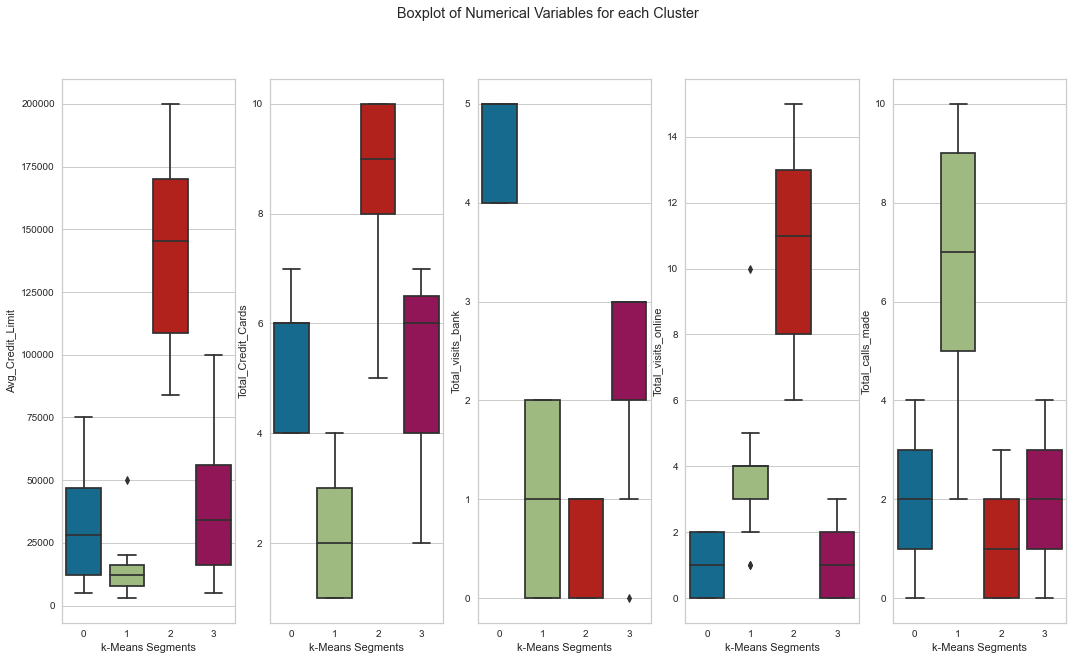

In [46]:
Fig, Axes = plt.subplots(1, 5, figsize = (18,10)) # Create a subplot for the above data for 1 row down & 4 columns over
Fig.suptitle('Boxplot of Numerical Variables for each Cluster') # Add Suplimentary Title for sub plot

Counter = 0
for i in range(5):
    sns.boxplot(ax = Axes[i], x = df['k-Means Segments'], y = df[Numeric_Cols[Counter]])
    Counter = Counter + 1

#### Box Plot - Scaled Data

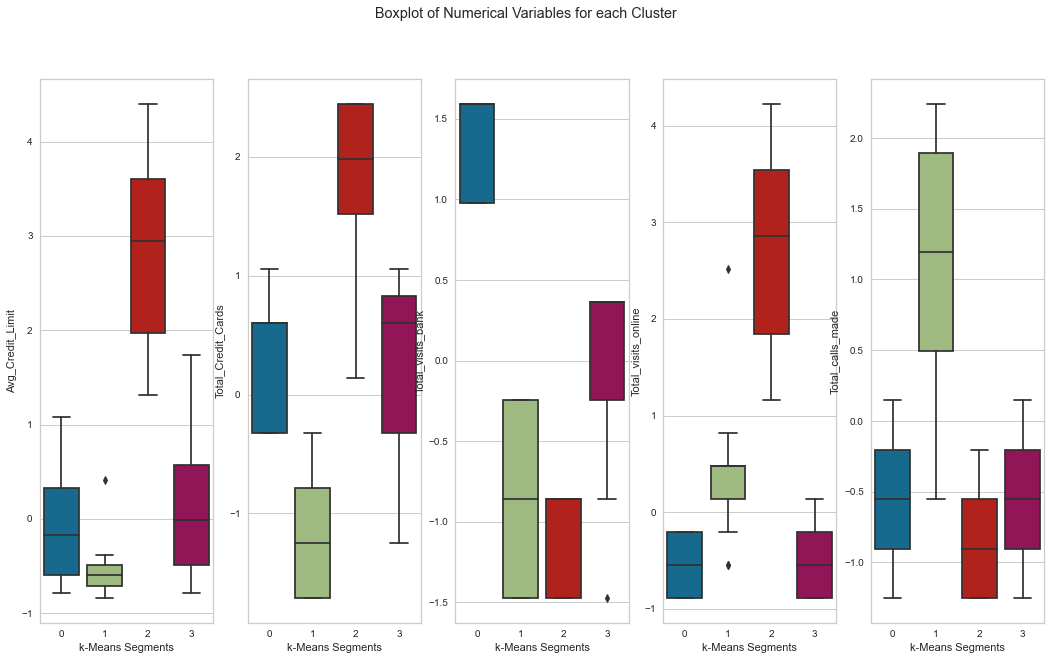

In [47]:
Fig, Axes = plt.subplots(1, 5, figsize = (18,10)) # Create a subplot for the above data for 1 row down & 4 columns over
Fig.suptitle('Boxplot of Numerical Variables for each Cluster') # Add Suplimentary Title for sub plot

Counter = 0
for i in range(5):
    sns.boxplot(ax = Axes[i], x = Subset_Scaled_df['k-Means Segments'], y = Subset_Scaled_df[Numeric_Cols[Counter]])
    Counter = Counter + 1

### Insights
All quoted figures **based on IQR** of each box in the above plots.

- **Cluster 0**:
    - This customer group has **very low Online Visits (0-2 a year) but very high in-person Bank Visits (4-5 a year)**
    - This customer has an average amount of Total Credit Cards (4-6) and a **rather low Credit Limit (\\$12.5k to close to \\$50k)**
    - This group of customers make a relatively low amount of **Calls to the Bank (1-3) each year**    
    - This is a more **'Traditional Banking'** (less technical) customer with **more conservative credit spending and limited Credit availability**
   
- **Cluster 1**:
    - This customer group has **average Online Visits (3-4 a year) and low in-person Bank Visits (0-2 a year)**
    - This customer has the lowest amount of Total Credit Cards (1-3) and a **extremly low Credit Limit (\\$10k to around \\$15k)**
    - This group of customers make the highest amount of **Calls to the Bank (5-9) each year** 
    - This is a more **'Conservative/Cash'** customer with very conservative credit usage and **hardly any cards on hand for 'any type of credit spending**
    
- **Cluster 2**:
    - This customer group has **the highest Online Visits (8-13 a year) and low in-person Bank Visits (0-1 a year)**
    - This customer has the highest amount of Total Credit Cards (8-10) and a **extremly high Credit Limit (\\$110k to around \\$170k)**
    - This group of customers make the lower amount of **Calls to the Bank (0-2) each year** 
    - This is a more **'Higher Spending Type'** customer, who prefers technology over traditional banking methods (visiting/calling directly) and is aggressive with their credit usage with **multiple cards on hand and very large overall limits to support their credit spending**

- **Cluster 3**:
    - This customer group has **very low Online Visits (0-2 a year) and average in-person Bank Visits (2-3 a year)**
    - This customer has the lowest amount of Total Credit Cards (4-7) and a **moderate Credit Limit (\\$20k to around \\$60k)**
    - This group of customers make the highest amount of **Calls to the Bank (1-3) each year**     
    - This is a more **'Beter than Average Type'** customer with less conservative credit usage and **above average count of cards available as needed**
    
### Recommendations    
- The bank should **target customers in Cluster 2 for the higher spending offers or specialized promotions/rewards** associated with higher spending campaigns, as this subset has the highest chance of converting and spending larger amounts between their **many Credit Cards and high Credit Limits**
- A secondary, fall back option, is to target the **next highest spending group, Cluster 3**, who are more conservative than Cluster 2 in overall spending and credit availability, but are **reliable and somewhat consistent to forecast when it comes to credit utilization**
- **Cluster groups 0 and 1 are most likely too Conservative/Traditional** in spending patterns and lifestyle to be very profitable, however **should still be catered to according to their customer profile (better in person service and phone communications)**

With Total Credit Cards owned being a large driver of potential Credit Card Spending (available Credit Limit as well as Credit Worthiness in general), it is worth comparing the clusters solely on that one variable.  

In [48]:
# Create a Pandas Crosstab summary table of each K Means Segment vs. respective Total Credit Cards owned
pd.crosstab(df['k-Means Segments'], df.Total_Credit_Cards).style.highlight_max(color = 'orange', axis=0)

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
k-Means Segments,,,,,,,,,,
0,0,0,0,55,33,58,44,0,0,0
1,59,63,52,47,0,0,0,0,0,0
2,0,0,0,0,1,1,7,11,11,19
3,0,1,1,49,40,58,50,0,0,0


### Insights

- It is very apparent that Cluster 1 consists of **customers with very few Credit Cards owned**, whereas Cluster 2 (although low numbers overall) consists of **only customers with a high count of Credit Cards**
- Clusters 0 and 3 have similar results for Credit Cards owned and vary in other ways outside of this variable.

### Hierarchical Clustering

#### Cophenetic Correlation

In [49]:
# List Distance Metrics
Dist_Metrics = ['euclidean', 'chebyshev', 'mahalanobis', 'cityblock']

# List Linkage Methods
Link_Methods = ['single', 'complete', 'average', 'weighted']

# Create default (0) values for Cophenetic Correlation and Max Distric Metric and Link Method combination with highest score
High_Cophenet_Corr = 0
High_DM_LM = [0,0]

for DM in Dist_Metrics:
    for LM in Link_Methods:
        Z = linkage(Subset_Scaled_df, metric = DM, method = LM)
        C, Coph_Dists = cophenet(Z, pdist(Subset_Scaled_df))
        print('Cophenetic Correlation for {} distance and {} linkage is {}'.format(DM.capitalize(), LM.capitalize(), round(C,4)))
        
        if High_Cophenet_Corr < C:
            High_Cophenet_Corr = C
            High_DM_LM[0] = DM
            High_DM_LM[1] = LM

Cophenetic Correlation for Euclidean distance and Single linkage is 0.8003
Cophenetic Correlation for Euclidean distance and Complete linkage is 0.9129
Cophenetic Correlation for Euclidean distance and Average linkage is 0.9224
Cophenetic Correlation for Euclidean distance and Weighted linkage is 0.9003
Cophenetic Correlation for Chebyshev distance and Single linkage is 0.6978
Cophenetic Correlation for Chebyshev distance and Complete linkage is 0.8794
Cophenetic Correlation for Chebyshev distance and Average linkage is 0.9082
Cophenetic Correlation for Chebyshev distance and Weighted linkage is 0.9134
Cophenetic Correlation for Mahalanobis distance and Single linkage is 0.8277
Cophenetic Correlation for Mahalanobis distance and Complete linkage is 0.6988
Cophenetic Correlation for Mahalanobis distance and Average linkage is 0.8805
Cophenetic Correlation for Mahalanobis distance and Weighted linkage is 0.8219
Cophenetic Correlation for Cityblock distance and Single linkage is 0.9053
Co

In [50]:
# Print the values for highest combinations of Distance Metrics/Linkage Methods achieving the highest Cophenetic score
print('The highest Cophenetic Correlation score is {} which is achieved with {} Distance Metric and {} Linkage Method.'.
     format(round(High_Cophenet_Corr,4),High_DM_LM[0].capitalize(), High_DM_LM[1].capitalize() ))

The highest Cophenetic Correlation score is 0.9224 which is achieved with Euclidean Distance Metric and Average Linkage Method.


Using **Euclidean Metric** above (which scored the highest), let's **test different Linkage Methods** in addition to the initial 4 used.

In [51]:
Link_Methods_All = ['single','complete','average','weighted', 'centroid', 'ward'] # Centroid & Ward methods added

High_Cophenet_Corr_All = 0
High_DM_LM_All = [0,0]

for LM in Link_Methods_All:
    Z = linkage(Subset_Scaled_df, metric = 'euclidean', method = LM)
    C, Coph_Dists = cophenet(Z, pdist(Subset_Scaled_df))
    print('Cophenetic Correlation for {} linkage is {}'.format(LM.capitalize(), round(C,4)))
    
    if High_Cophenet_Corr_All < C:
        High_Cophenet_Corr_All = C
        High_DM_LM_All[0] = 'euclidean' # Euclidean already chosen above to be used for all instances in Loop
        High_DM_LM_All[1] = LM

Cophenetic Correlation for Single linkage is 0.8003
Cophenetic Correlation for Complete linkage is 0.9129
Cophenetic Correlation for Average linkage is 0.9224
Cophenetic Correlation for Weighted linkage is 0.9003
Cophenetic Correlation for Centroid linkage is 0.9167
Cophenetic Correlation for Ward linkage is 0.7826


In [52]:
# Print the values for highest scoring Linkage Methods achieving the highest Cophenetic score
print('The highest Cophenetic Correlation score is {} which is achieved with {} Linkage Method.'.
     format(round(High_Cophenet_Corr_All,4),High_DM_LM[1].capitalize()))

The highest Cophenetic Correlation score is 0.9224 which is achieved with Average Linkage Method.


The Euclidean Metric and Average Linkage Method is **still the highest scoring conbination for Cophenetic Correlation**.

#### Dendrogram

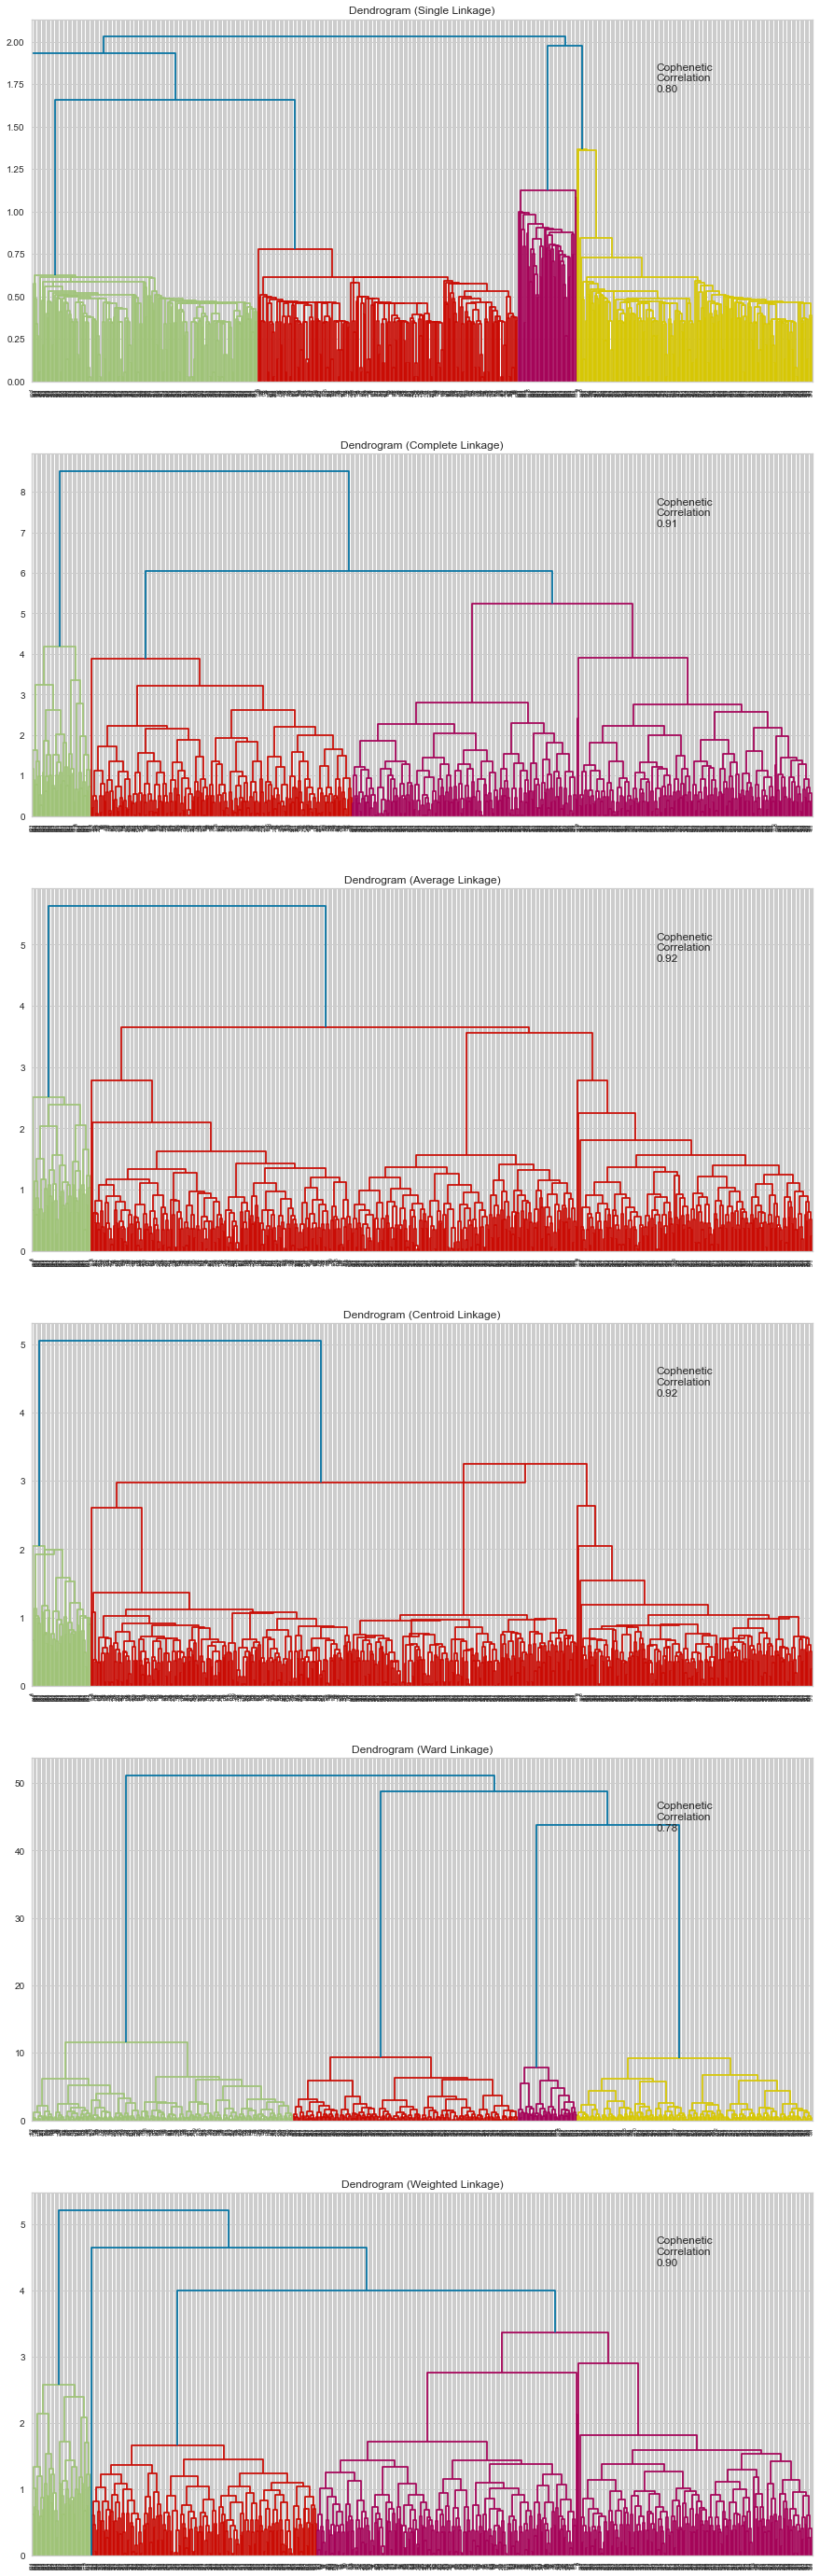

In [53]:
# list of all Linkage Methods
Link_Methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of each Cophenetic Correlation calculation
Compare_Cols = ["Linkage", "Cophenetic Coefficient"]

Fig, Axs = plt.subplots(len(Link_Methods), 1, figsize = (15,50)) # 6 (Linkage Methods) rows down and 1 column across

# Enumerate through the each link in list Linkage Methods
for i, Method in enumerate(Link_Methods):
    Z = linkage(Subset_Scaled_df, metric = 'euclidean', method = Method)
    
    dendrogram(Z, ax=Axs[i])
    Axs[i].set_title(f"Dendrogram ({Method.capitalize()} Linkage)")
    
    C, Coph_Dists = cophenet(Z, pdist(Subset_Scaled_df))
    Axs[i].annotate(
        f"Cophenetic\nCorrelation\n{C:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",)

### Observations

- The Cophenetic Correlation is the **Highest (92) for Average and Centroid** linkage methods
- **Average Linkage Method is sufficient to use**, plus it is an option for **Agglomerative Clustering**
- Somewhere between either 4 or 5 clusters appears to be the appropriate number based on the above dendrogram
    - **4 Clusters was how the data was previously split based on the Silhouette Score** (determined to be better than 3 clusters from the Elbow Curve analysis)
    - We will **test first with 5 then 4 Clusters** to see which Profile seems better

#### Create Model with Agglomerative Clustering (Building on Clusters)

In [54]:
# Create and fit the Hierarchy Model using Agglomerative Clustering (building on each new cluster)
Hierarchy_Model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
Hierarchy_Model.fit(Subset_Scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [55]:
# Create a new column for the 5 HC Clusters in the model above, in the regular and scaled DataFrames 
Subset_Scaled_df['HC_Clusters'] = Hierarchy_Model.labels_
df['HC_Clusters'] = Hierarchy_Model.labels_

### Create Secondary Cluster Profiles

#### Original Data

In [56]:
# Create Cluster grouping by mean of HC Clusters in full (non-scaled) DataFrame 
Cluster_Profile3 = df.groupby('HC_Clusters').mean()
Cluster_Profile3 = Cluster_Profile3.iloc[: , :-1]

In [57]:
# Group Cluster Profile to main DataFrame by variable: Average Credit Limit
Cluster_Profile3['Count_in_Each_Segment'] = (
    df.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values
)

In [58]:
# Check the Cluster Profile for Main DataFrame
Cluster_Profile3.style.highlight_max(color = 'purple')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_Each_Segment
HC_Clusters,,,,,,
0,12167.420814,2.393665,0.927602,3.574661,6.923077,221
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,35580.808081,5.540404,2.484848,0.969697,2.085859,198
3,31226.315789,5.478947,4.515789,1.010526,1.936842,190
4,100000.000000,2.000000,1.000000,1.000000,0.000000,1


**5 Clusters** appears to be too many and **created a single count cluster (Cluster 4) that offers little to no value**.  It looks like 4 Clusters is still optimal for the above chosen, however let's **test another Linkage option (Ward) first on the 5 clusters**. 

#### Create Model with Agglomerative Clustering (Ward Linkage)

In [59]:
# Create and fit the Hierarchy Model using Agglomerative Clustering - with Ward Linkage this time
Hierarchy_Model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
Hierarchy_Model.fit(Subset_Scaled_df)

AgglomerativeClustering(n_clusters=5)

In [60]:
# Create a new column for the 5 HC Clusters in the model above, in the regular and scaled DataFrames 
Subset_Scaled_df['HC_Clusters'] = Hierarchy_Model.labels_
df['HC_Clusters'] = Hierarchy_Model.labels_

### Cluster Profiles with Ward Linkage

#### Original Data

In [61]:
# Create Cluster grouping by mean of HC Clusters in full (non-scaled) DataFrame 
Cluster_Profile3 = df.groupby('HC_Clusters').mean()
Cluster_Profile3 = Cluster_Profile3.iloc[: , :-1]

In [62]:
# Group Cluster Profile to main DataFrame by variable: Average Credit Limit
Cluster_Profile3['Count_in_Each_Segment'] = (
    df.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values
)

In [63]:
Cluster_Profile3.style.highlight_max(color = 'violet')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_Each_Segment
HC_Clusters,,,,,,
0,31226.315789,5.478947,4.515789,1.010526,1.936842,190
1,35904.522613,5.522613,2.477387,0.969849,2.075377,199
2,11852.713178,2.589147,0.961240,3.379845,5.627907,129
3,141040.000000,8.740000,0.600000,10.900000,1.080000,50
4,12608.695652,2.119565,0.880435,3.847826,8.739130,92


#### Scaled Data

In [64]:
# Create Cluster grouping by mean of HC Clusters in full (non-scaled) DataFrame 
Cluster_Profile4 = Subset_Scaled_df.groupby('HC_Clusters').mean()
Cluster_Profile4 = Cluster_Profile4.iloc[: , :-1]

In [65]:
# Group Cluster Profile to main DataFrame by variable: Average Credit Limit
Cluster_Profile4['Count_in_Each_Segment'] = (
    Subset_Scaled_df.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values
)

In [66]:
Cluster_Profile4.style.highlight_max(color = 'violet')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_Each_Segment
HC_Clusters,,,,,,
0,-0.089048,0.356795,1.295713,-0.543901,-0.575064,190
1,0.035383,0.376953,0.045601,-0.557768,-0.526678,199
2,-0.604345,-0.977251,-0.884221,0.263775,0.714101,129
3,2.831764,1.862226,-1.105763,2.827319,-0.874330,50
4,-0.584237,-1.194029,-0.933778,0.423305,1.800746,92


**The Ward Linkage option actually performed quite well on 5 Clusters**, unlike the Average Linked tested above - all clusters have a significant enought count in each segment.  **We will keep the 5 Clusters and use the Ward Linkage** going forward.

### Plot Cluster Profiles

#### Box Plot - Original Data

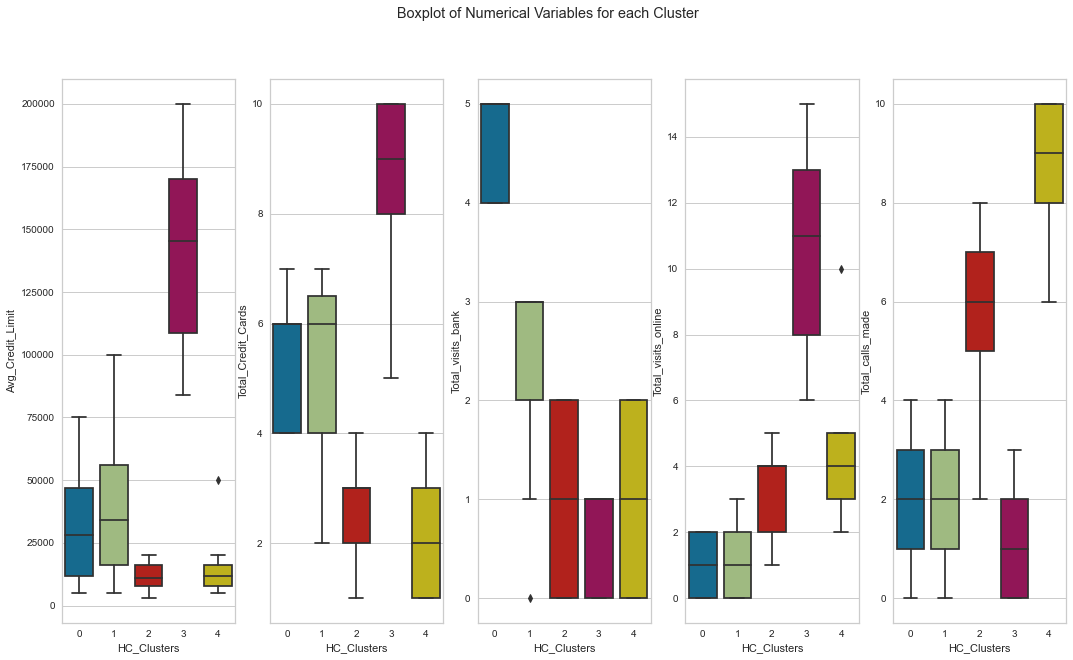

In [67]:
Fig, Axes = plt.subplots(1, 5, figsize = (18,10)) # Create a subplot for the above data for 1 row down & 4 columns over
Fig.suptitle('Boxplot of Numerical Variables for each Cluster') # Add Suplimentary Title for sub plot

Counter = 0
for i in range(5):
    sns.boxplot(ax = Axes[i], x = df['HC_Clusters'], y = df[Numeric_Cols[Counter]])
    Counter = Counter + 1

#### Box Plot - Scaled Data

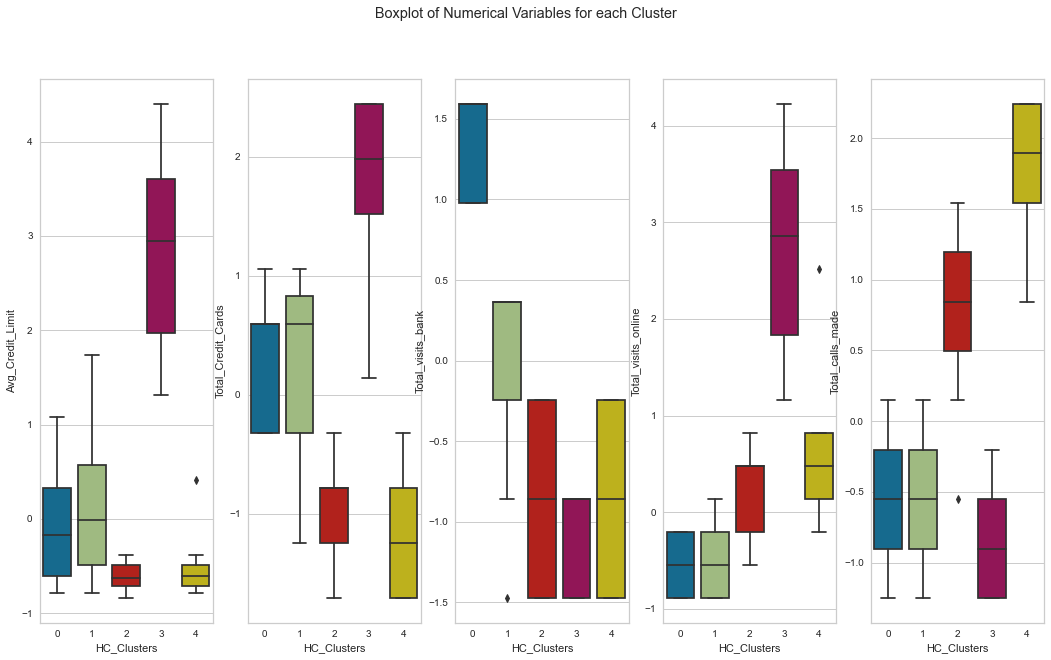

In [68]:
Fig, Axes = plt.subplots(1, 5, figsize = (18,10)) # Create a subplot for the above data for 1 row down & 4 columns over
Fig.suptitle('Boxplot of Numerical Variables for each Cluster') # Add Suplimentary Title for sub plot

Counter = 0
for i in range(5):
    sns.boxplot(ax = Axes[i], x = Subset_Scaled_df['HC_Clusters'], y = Subset_Scaled_df[Numeric_Cols[Counter]])
    Counter = Counter + 1

### Insights
All quoted figures **based on IQR** of each box in the above plots.

- **Cluster 0**:
    - This customer group has **very low Online Visits (0-2 a year) but very high in-person Bank Visits (4-5 a year)**
    - This customer has an average amount of Total Credit Cards (4-6) and an **average Credit Limit (\\$12.5k to close to \\$50k)**
    - This group of customers make a relatively low amount of **Calls to the Bank (1-3) each year**    
    - This is a more **'Traditional Banking'** (less technical) customer with **more conservative credit spending and limited Credit availability'**
   
- **Cluster 1**:
    - This customer group has **very low Online Visits (0-2 a year) and moderate in-person Bank Visits (2-3 a year)**
    - This customer has a relatively high amount of Total Credit Cards (4-6.5 avg.) and a **moderate Credit Limit (\\$20k to around \\$60k)**
    - This group of customers make a relatively low amount of **Calls to the Bank (1-3) each year**
    - This is an **'Above Average Spending, less Technical'** customer than Cluster 0 with slightly higher count of Credit Cards and respective Credit Limits, calling the bank less frequently each year
    
- **Cluster 2**:
    - This customer group has **relatively low Online Visits (2-4 a year) and low in-person Bank Visits (0-2 a year)**
    - This customer has a very low amount of Total Credit Cards (2-3) and a **very low Credit Limit (\\$10k to around \\$20k)**
    - This group of customers make one of the highest amount of **Calls to the Bank (5-7) each year**     
    - This is a more **'Low Spending, Low Credit Utilization'** type of customer with very conservative Credit Usage or access to Credit Facilities and is best communicated with through phone calls
    
- **Cluster 3**:
    - This customer group has **the highest Online Visits (8-13 a year) and low in-person Bank Visits (0-1 a year)**
    - This customer has the highest amount of Total Credit Cards (8-10) and a **extremly high Credit Limit (\\$110k to around \\$170k)**
    - This group of customers make the lower amount of **Calls to the Bank (0-2) each year** 
    - This is a more **'Higher Spending Type'** customer, who prefers technology over traditional banking methods (visiting/calling directly) and is aggressive with their credit usage with **multiple cards on hand and very large overall limits to support their credit spending**
    
- **Cluster 4**:
    - This customer group has **relatively low Online Visits (3-5 a year) and low in-person Bank Visits (0-2 a year)**
    - This customer has a the lowest amount of Total Credit Cards (1-3) and a **very low Credit Limit (\\$10k to around \\$20k)**
    - This group of customers make one the highest amount of **Calls to the Bank (8-10) each year**     
    - This type of customer is the **'Lowest Spending, Lowest Credit Utilization'** type of customer with very conservative Credit Usage or access to Credit Facilities and is best communicated with through phone calls with the occassion online login
    
### Recommendations    
- The bank should **target customers in Cluster 3 for the higher spending offers or specialized promotions/rewards** associated with higher spending campaigns, as this subset has the highest chance of converting and spending larger amounts between their **many Credit Cards and high Credit Limits**
- A secondary, fall back option, is to target the **next highest spending group, Cluster 1**, who are more conservative than Cluster 3 in overall spending and credit availability, but are **reliable and somewhat consistent to forecast when it comes to credit utilization**
    - A point to note regarding this customer type, however is that they **prefer traditional bank visits** over online banking, so **marketing campaigns should be in-person instead of through email or internet advertisements**
- **Cluster groups 2 and 4, and to some extent 0, are most likely to be low spending for either being too Conservative/Traditional** in spending patterns or with little available Credit
    - These customers types may not be very profitable to the bank, however should still be catered to according to their customer profile: 
        - **Better in person service and phone communications combined with cheaper promotional and/or smaller balance transfer offers**

### Primary Component Analysis (PCA) - Dimensionality Reduction
The goal will be to reduce as many dimensions as possible, **while still explaining 90% or more of the variance**.

In [69]:
# Create a new copy of the Scaled Subset for PCA - drop k-Means Segments/HC Clusters from prior analysis which aren't needed
Subset_Scaled_df2 = Subset_Scaled_df.drop(columns=['HC_Clusters','k-Means Segments'], axis=1).copy()
Subset_Scaled_df2.head() # Examine the top 5 rows of the new Subset Copy

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [70]:
# Create and fit PCA reduction model to Subset Copy
PCA = PCA()
PCA.fit(Subset_Scaled_df2)

PCA()

In [71]:
# Inspect the Explained Variance ratio (%) by cluster in the PCA model

PCA.explained_variance_ratio_

array([0.45736578, 0.37426483, 0.06401348, 0.0555688 , 0.04878711])

In [72]:
# Add the cummulative sum of each variance ratio (%) above, un/commenting line items as needed

(round(
  PCA.explained_variance_ratio_[0]
+ PCA.explained_variance_ratio_[1]
+ PCA.explained_variance_ratio_[2] # 90% hit - remaining lines can be commented out/ignored
# + PCA.explained_variance_ratio_[3]
# + PCA.explained_variance_ratio_[4]
,4))

0.8956

We can see above that the overall variances are explained, cummatively, in order of magnitude, as follows:
- Avg_Credit_Limit: 45.7%
- Total_Credit_Cards: 83.2%
- Total_visits_bank: **90% (Target can be set to 3 components/variables)**
- Total_visits_online: 95%
- Total_calls_made: 100%

This can be further plotted below to confirm the findings.

### Plotting PCA Explained Variance Ratios (3 Components)

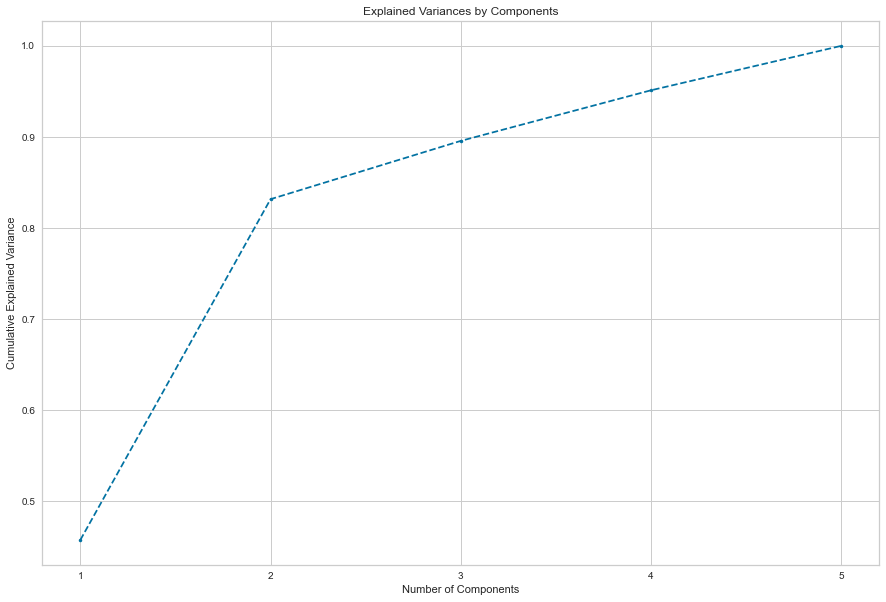

In [73]:
# Create a summary plot with range 1-5, x Axis incrementing by 1 
plt.figure(figsize=(15,10))
plt.plot(range(1,6), PCA.explained_variance_ratio_.cumsum(), marker = '.',  linestyle = '--')

plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(np.arange(1, 6, step=1)); # Cycle through the range from 1 through 5 inclusive, increasing by 1

**The above plot further confirms that 90% of the Variance Explanation can be explained using just 3 components** (60% of the remaining variables.  As a result, a PCA of 90% will be selected and **only 3 variables (Avg_Credit_Limit, Total_Credit_Cards, and Total_visits_bank) will be utilized**.

In [95]:
# Recalibrate PCA to only use variables resulting in 90% (use 89.5% due to rounding) Variance Explanation - i.e. 3 Components
PCA = PCA(0.895, svd_solver="full") # Full solver is suggested option for overall completion speed, although dataset is small

# Fit the PCA model results to the Subset Copy
PCA.fit(Subset_Scaled_df2)

PCA(n_components=0.895, svd_solver='full')

Let's recheck the Explained Variance Ratios **when only using 3 of the components**.

In [96]:
PCA.explained_variance_ratio_

array([0.45736578, 0.37426483, 0.06401348])

In [97]:
# Add the cummulative sum of each variance ratio (%) above for the 3 remaining components - should equal 89.5% unrounded

(round(
  PCA.explained_variance_ratio_[0]
+ PCA.explained_variance_ratio_[1]
+ PCA.explained_variance_ratio_[2] # 90% hit - remaining lines can be commented out/ignored
,4))

0.8956

In [98]:
# Transform the Subset Copy and convert to a DataFrame
Subset_PCA = PCA.transform(Subset_Scaled_df2) # Transform quickly applies a feature/model into a temporary DataFrame created
PCA_Subset_df = pd.DataFrame(Subset_PCA) # Create official Pandas DataFrame of above transformed PCA Subset

### Hierarchical Clustering - Using Reduced Dimensionality

#### Dendrogram - Only 3 Components (90% PCA)

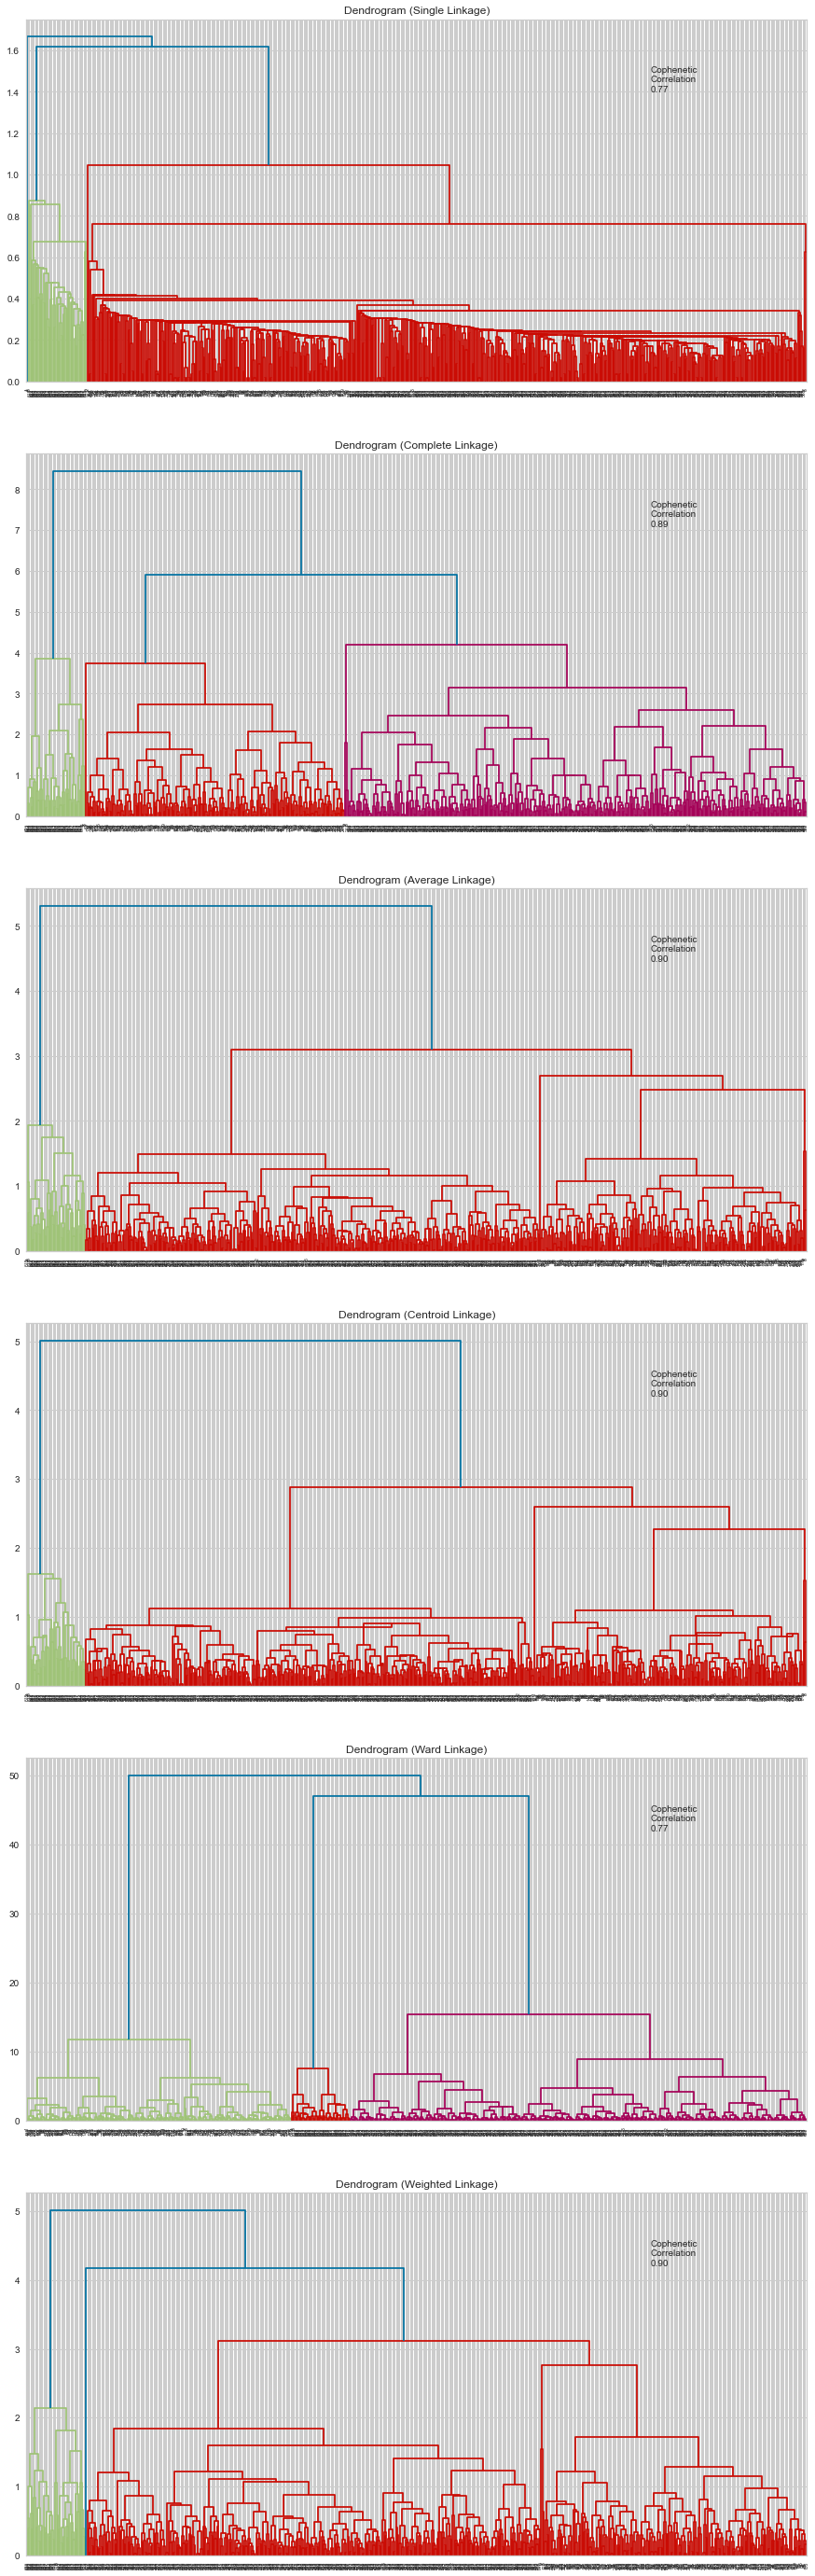

In [100]:
# list of all Linkage Methods
Link_Methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of each Cophenetic Correlation calculation
Compare_Cols = ["Linkage", "Cophenetic Coefficient"]

Fig, Axs = plt.subplots(len(Link_Methods), 1, figsize = (15,50)) # 6 (Linkage Methods) rows down and 1 column across

# Enumerate through the each link in list Linkage Methods
for i, Method in enumerate(Link_Methods):
    Z = linkage(PCA_Subset_df, metric = 'euclidean', method = Method)
    
    dendrogram(Z, ax=Axs[i])
    Axs[i].set_title(f"Dendrogram ({Method.capitalize()} Linkage)")
    
    C, Coph_Dists = cophenet(Z, pdist(PCA_Subset_df))
    Axs[i].annotate(
        f"Cophenetic\nCorrelation\n{C:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",)

### Observations

- The Cophenetic Correlation is the **Highest (90) for Average and Centroid** linkage methods
- **Average Linkage Method is sufficient to use**, plus it is an option for **Agglomerative Clustering**
- 4 clusters appears to be the appropriate number based on the above dendrogram
    - We will **test with 4 Clusters using Average Linkage Method** to see which Profile seems better
    - It will also be **worth testing with the Ward Linkage method (77)**, which was previously chosen for 5 clusters, as it shows a **far cleaner cluster split** in the above Dendrogram

#### Create Model with Agglomerative Clustering - Fit to PCA Subset

In [101]:
# Create and fit the Hierarchy Model using Agglomerative Clustering to PCA Subset data
Hierarchy_Model2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
Hierarchy_Model2.fit(Subset_PCA)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [102]:
# Create a new column for the 5 HC Clusters in the model above, in the regular and scaled DataFrames 

# Create new copies of both the regular and scaled DataFrames, dropping the old columns for k-Mean Segments and HC Clusters 
Subset_Scaled_df2 = Subset_Scaled_df.drop(columns=['k-Means Segments','HC_Clusters'], axis=1)
df2 = df.drop(columns=['k-Means Segments','HC_Clusters'], axis=1)

# Add new Hierarchical Clusters (labels in column) to the regular and scaled DataFrames
Subset_Scaled_df2['PCA_HC_Clusters'] = Hierarchy_Model2.labels_
df2['PCA_HC_Clusters'] = Hierarchy_Model2.labels_

### Create Secondary Cluster Profiles

#### Original Data

In [103]:
# Create Cluster grouping by mean of HC Clusters in full (non-scaled) DataFrame 
Cluster_Profile5 = df2.groupby('PCA_HC_Clusters').mean()

In [104]:
# Group Cluster Profile to main DataFrame by variable: Average Credit Limit
Cluster_Profile5['Count_in_Each_Segment'] = df2.groupby('PCA_HC_Clusters')['Avg_Credit_Limit']
Cluster_Profile5 = Cluster_Profile5

In [105]:
# Group Cluster Profile to main DataFrame by variable: Average Credit Limit
Cluster_Profile5['Count_in_Each_Segment'] = (
    df2.groupby('PCA_HC_Clusters')['Avg_Credit_Limit'].count().values
)

In [106]:
# Check the Cluster Profile for Main DataFrame
Cluster_Profile5.style.highlight_max(color='turquoise')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_Each_Segment
PCA_HC_Clusters,,,,,,
0,12373.333333,2.417778,0.942222,3.506667,6.817778,225
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,33679.687500,5.526042,3.500000,0.979167,2.000000,384
3,50000.000000,3.000000,0.000000,10.000000,9.000000,1


**4 Clusters** appears to be too many and **created a single count cluster (Cluster 3) that offers little to no value**.  It looks like 3 Clusters is actually optimal for the above chosen (if using Average Linkage), however let's **test another Linkage option (Ward) first on the 4 clusters**. 

#### Create Model with Ward Linkage & Reduced Dimensionality

In [107]:
# Create and fit the Hierarchy Model using Agglomerative Clustering - with Ward Linkage this time
Hierarchy_Model2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
Hierarchy_Model2.fit(Subset_PCA)

AgglomerativeClustering(n_clusters=4)

In [108]:
# Create a new column for the 5 HC Clusters in the model above, in the regular and scaled DataFrames 
Subset_Scaled_df2['PCA_HC_Clusters'] = Hierarchy_Model2.labels_
df2['PCA_HC_Clusters'] = Hierarchy_Model2.labels_

### Cluster Profiles with Ward Linkage

#### Original Data

In [109]:
# Create Cluster grouping by mean of HC Clusters in full (non-scaled) DataFrame 
Cluster_Profile5 = df2.groupby('PCA_HC_Clusters').mean()
# Cluster_Profile5 = Cluster_Profile5.iloc[: , :-1]

In [110]:
# Group Cluster Profile to main DataFrame by variable: Average Credit Limit
Cluster_Profile5['Count_in_Each_Segment'] = (
    df2.groupby('PCA_HC_Clusters')['Avg_Credit_Limit'].count().values
)

In [111]:
Cluster_Profile5.style.highlight_max(color = 'red')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_Each_Segment
PCA_HC_Clusters,,,,,,
0,12589.285714,2.401786,0.928571,3.549107,6.852679,224
1,36227.272727,5.371901,2.785124,1.020661,1.950413,242
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,29027.777778,5.770833,4.680556,0.923611,2.111111,144


#### Scaled Data

In [112]:
# Create Cluster grouping by mean of HC Clusters in full (non-scaled) DataFrame 
Cluster_Profile6 = Subset_Scaled_df2.groupby('PCA_HC_Clusters').mean()
# Cluster_Profile6 = Cluster_Profile6.iloc[: , :-1]

In [113]:
# Group Cluster Profile to main DataFrame by variable: Average Credit Limit
Cluster_Profile6['Count_in_Each_Segment'] = (
    Subset_Scaled_df2.groupby('PCA_HC_Clusters')['Avg_Credit_Limit'].count().values
)

In [114]:
Cluster_Profile6.style.highlight_max(color = 'red')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_Each_Segment
PCA_HC_Clusters,,,,,,
0,-0.584753,-1.063745,-0.904256,0.321475,1.141872,224
1,0.043967,0.307378,0.234330,-0.540447,-0.570324,242
2,2.831764,1.862226,-1.105763,2.827319,-0.874330,50
3,-0.147524,0.491541,1.396761,-0.573530,-0.514198,144


**The Ward Linkage option actually performed quite well on 4 Clusters**, unlike the Average Linked tested above - all clusters have a significant enought count in each segment.  **We will keep the 4 Clusters and use the Ward Linkage** going forward.

### Plot Cluster Profiles

#### Box Plot - Original Data

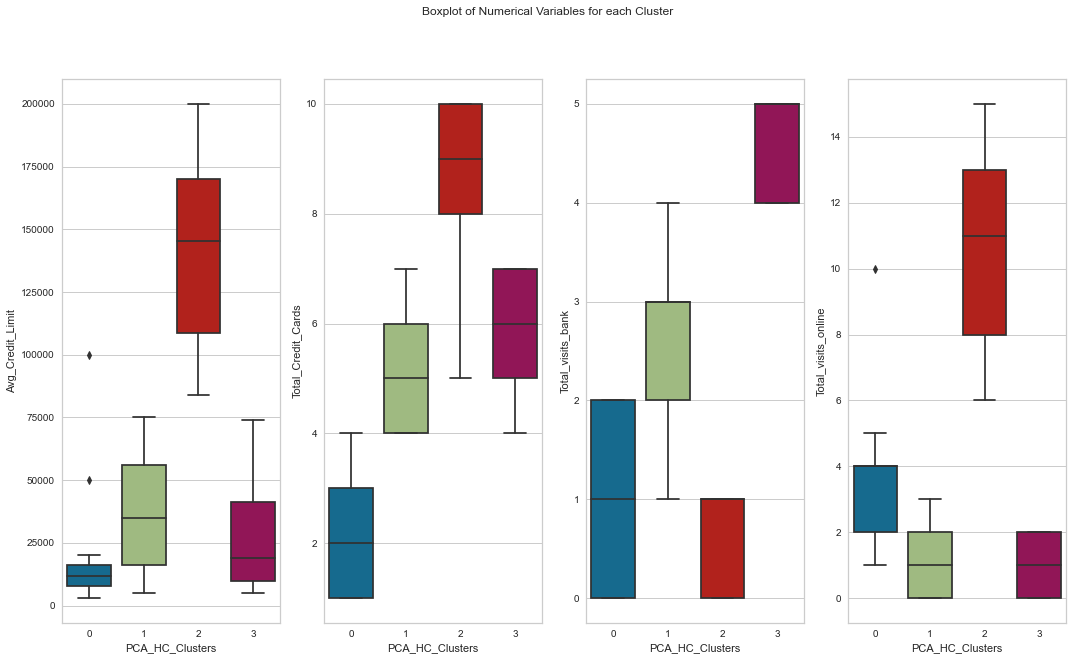

In [119]:
Fig2, Axes2 = plt.subplots(1, 4, figsize = (18,10)) # Create a subplot for the above data for 1 row down & 4 columns over
Fig2.suptitle('Boxplot of Numerical Variables for each Cluster') # Add Suplimentary Title for sub plot

Counter = 0
for i in range(4):
    sns.boxplot(ax = Axes2[i], x = df2['PCA_HC_Clusters'], y = df2[Numeric_Cols[Counter]])
    Counter = Counter + 1

#### Box Plot - Scaled Data

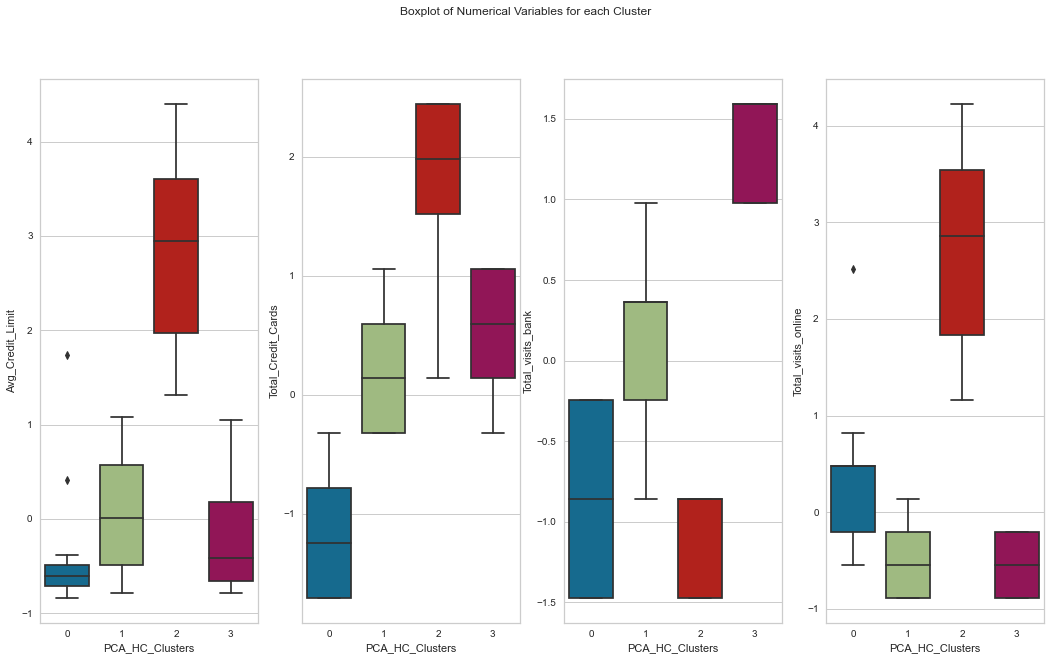

In [118]:
Fig2, Axes2 = plt.subplots(1, 4, figsize = (18,10)) # Create a subplot for the above data for 1 row down & 4 columns over
Fig2.suptitle('Boxplot of Numerical Variables for each Cluster') # Add Suplimentary Title for sub plot

Counter = 0
for i in range(4):
    sns.boxplot(ax = Axes2[i], x = Subset_Scaled_df2['PCA_HC_Clusters'], y = Subset_Scaled_df2[Numeric_Cols[Counter]])
    Counter = Counter + 1

### Insights
All quoted figures **based on IQR** of each box in the above plots.

- **Cluster 0**:
    - This customer group has **relatively low Online Visits (2-4 a year) and very low in-person Bank Visits (0-2 a year)**
    - This customer has a low amount of Total Credit Cards (1-3) and an **very low Credit Limit (\\$10k to \\$20k)**
    - This group of customers make a very high amount of **Calls to the Bank (5-9) each year**    
    - This is a more **'Traditional Banking'** (less technical) customer with **very conservative credit spending and Credit Cards on hand for 'emergencies'**
   
- **Cluster 1**:
    - This customer group has **very low Online Visits (0-2 a year) and moderate in-person Bank Visits (2-3 a year)**
    - This customer has a relatively high amount of Total Credit Cards (4-6) and a **moderate Credit Limit (\\$20k to around \\$60k)**
    - This group of customers make a relatively low amount of **Calls to the Bank (1-3) each year**
    - This is an **'Above Average Spending, less Technical'** with slightly higher count of Credit Cards and respective Credit Limits, calling the bank less frequently each year
    
- **Cluster 2**:
    - This customer group has a **high count of Online Visits (8-13 a year) and low in-person Bank Visits (0-1 a year)**
    - This customer has a **very high count of Credit Cards (8-10) and the very highest Credit Limit (\\$110k to around \\$170k)**
    - This group of customers make the lowest amount of **Calls to the Bank (0-1) each year**     
    - This is a more **'Higher Spending Type'** customer, who prefers technology over traditional banking methods (visiting/calling directly) and is aggressive with their credit usage with **multiple cards on hand and very large overall limits to support their credit spending**
    
- **Cluster 3**:
    - This customer group has **very low Online Visits (0-2 a year) and higher in-person Bank Visits (4-5 a year)**
    - This customer has a relatively high amount of Total Credit Cards (5-7) and a **somewhat lower Credit Limit (\\$15k to around \\$40k)**
    - This group of customers make a relatively low amount of **Calls to the Bank (1-3) each year**
    - Similar to Cluster 1, this is an **'Above Average Spending, less Technical'** with slightly higher count of Credit Cards and respective Credit Limits, prefering to call the bank more frequently each year than Cluster 1 customers
    
    
### Recommendations    
- The bank should **target customers in Cluster 2 for the higher spending offers or specialized promotions/rewards** associated with higher spending campaigns, as this subset has the highest chance of converting and spending larger amounts between their **many Credit Cards and high Credit Limits**
- A secondary, fall back option, is to target the **next highest spending group, Cluster 1**  (though far behind), who are more conservative than Cluster 2 in overall spending and credit availability, but are **reliable and somewhat consistent to forecast when it comes to credit utilization**
    - A point to note regarding this customer type, however is that they **prefer traditional bank visits** over online banking, so **marketing campaigns should be in-person instead of through email or internet advertisements**
- **Cluster groups 0 and 3, are most likely to be low spending for either being too Conservative/Traditional** in spending patterns or with little available Credit
    - These customers types may not be very profitable to the bank, however should still be catered to according to their customer profile: 
        - **Better in person service and phone communications combined with cheaper promotional and/or smaller balance transfer offers**

### Cluster Summary & Selection
Of the **three Cluster Profiles created (k-Means, Hierarchical/Dendrogram, and PCA (Reduced Dimensionality) Dendrogram**, the following insights and recommendations are provided:
- Similarities existed bewtween the 3 cluster profiles, with a **clear 'Heavy Spending' customer and various 'More Conservative/Traditional customers identified**, though the cluster ordering shifted/grew between models
    - The **Ward Linkage** model was found to score slightly **lower Cophenetic Correlations scores but showed a clearer cluster segmentation within the Dendrogram** and was therefore chosen for final Hierarchical models (Regular and PCA reduced)
    - The **Euclidean Distance Metric** was found to score the highest results and used in all Hierarchical models
- Both the **k-Means and PCA (Ward Linkage)** models were based on **4 clusters** and offered substantial segmentation in regards to Customer Profiling
    - Due to the incorporation of Primary Component Analysis (PCA) it was determined that 90% Variance Explanation could be achieve with **only 3 of the 5 components included (cumulatively)**:
        - **Avg_Credit_Limit**: 45.7%
        - **Total_Credit_Cards**: 83.2%
        - **Total_visits_bank**: 90%
    - Incorporating PCA with the Ward Linkage Method created 4 very clean Customer Profiles, with a clear Heavy Spending (target) customer identified
- A Hierarchical Cluster model and Dendrogram, was attempted using **5 clusters** but was found to **offer slightly redundant segmentation details and little additional value vs. the 4 cluster Profiles**
- Finally, due to the relatively similar value provided and the benefit of reduced Dimensionality (3/5 components selected), the **Ward Linkage PCA-reduced 4 Cluster Hierarchical model** was selected as the final option on which to base Customer Profiles